In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
with warnings.catch_warnings():
	warnings.simplefilter("ignore")

C:\Users\User\AppData\Local\Temp\ipykernel_24720\3364356373.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1 Global Analysis 
## 1. Creation of a global dataframe

In [2]:
df_full = generate_global_df()
display(df_full.shape)
display(df_full.head(2))


(155019, 91)

Name      City      Country     Region  \
0  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   
1  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   

  Continent           Location  Score  NbReviews  Distance from center  Stars  \
0   America  Condado, San Juan    8.2     1398.0                   5.3      4   
1   America  Condado, San Juan    8.2     1398.0                   5.3      4   

                                            Url link  Staff_rating  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   

   Facilities_rating  Cleanliness_rating  Comfort_rating  \
0                8.5                 8.7             8.7   
1                8.5                 8.7             8.7   

   Value_for_money_rating  Location_rating                         Room Type  \
0                     7.8              8.9  King Executive Room with Balcony   
1                     7.8              8.9  King Executive Room with Balcony   

   Guests nb  Price  Breakfast  Cancellation  Region Number  Continent Number  \
0        2.0  342.0       23.0           1.0             29                19   
1        2.0  379.0        0.0           1.0             29                19   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                                NaN           

   Price per Square Meter to Buy Apartment in City Centre  \
0                                                NaN        
1                                                NaN        

   International Primary School, Yearly for 1 Child  \
0                                           10508.4   
1                                           10508.4   

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             442.32                     
1                                             442.32                     

   1 Pair of Jeans (Levis 501 Or Similar)  \
0                                   44.57   
1                                   44.57   

   1 Pair of Men Leather Business Shoes  \
0                                101.06   
1                                101.06   

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     80.81   
1                                     80.81   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Apples (1kg)  \
0                                             42.22          5.28   
1                                             42.22          5.28   

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          2.26                                              12.57    
1          2.26                                              12.57    

   Bottle of Wine (Mid-Range)  Chicken Fillets (1kg)  \
0                       16.89                   8.19   
1                       16.89                   8.19   

   Cigarettes 20 Pack (Marlboro)  Domestic Beer (0.5 liter bottle)  \
0                           9.92                              2.05   
1                           9.92                              2.05   

   Eggs (regular) (12)  Imported Beer (0.33 liter bottle)_x  Lettuce (1 head)  \
0                 5.18                                  2.6              2.34   
1                 5.18                                  2.6              2.34   

   Loaf of Fresh White Bread (500g)  Local Cheese (1kg)  \
0                              3.34                7.93   
1                              3.34                7.93   

   Milk (regular), (1 liter)  Onion (1kg)  Oranges (1kg)  Potato (1kg)  \
0                       1.97         2.68            NaN          4.01   
1                       1.97         2.68            NaN          4.01   

   Rice (white), (1kg)  Tomato (1kg)  Water (1.5 liter bott

In [3]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]
display(df_hotel_rooms.shape)
df_hotel_rooms.head(2)

(155019, 6)

Url link  Guests nb  Price  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...        2.0  342.0   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...        2.0  379.0   

   Cancellation                         Room Type  Breakfast  
0           1.0  King Executive Room with Balcony       23.0  
1           1.0  King Executive Room with Balcony        0.0

In [4]:
df_hotels = df_full.groupby(['Url link', 'Location']).first().reset_index()[['City']+list(set(columns_hotel)-set(columns_city))]
df_hotels.insert(0, 'Distance from center', df_hotels.pop('Distance from center'))
df_hotels.insert(0, 'Score', df_hotels.pop('Score'))
df_hotels.insert(0, 'Stars', df_hotels.pop('Stars'))
df_hotels.insert(0, 'Location', df_hotels.pop('Location'))
df_hotels.insert(0, 'Name', df_hotels.pop('Name'))
df_hotels.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  Location_rating  \
0                   3.0    Ajman              8.9   
1                   0.1  Sharjah              9.0   

                                            Url link  Comfort_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...             9.1   
1  https://www.booking.com/hotel/ae/al-badayer-re...             9.4   

   Facilities_rating  Cleanliness_rating  NbReviews  Value_for_money_rating  \
0                8.9                 9.0     1441.0                     8.1   
1                9.1                 9.4     1606.0                     8.7   

   Staff_rating  
0           9.0  
1           9.7

In [5]:
df_cities = df_full.groupby('City').first().reset_index()[['Country']+list(set(columns_city)-set(columns_country))]
df_cities.insert(0, 'Country', df_cities.pop('Country'))
df_cities.insert(0, 'City', df_cities.pop('City'))
display(df_cities.head(2))

City  Country  Lettuce (1 head)  Cinema, International Release, 1 Seat  \
0  Aachen  Germany              1.89                                  10.00   
1  Aarhus  Denmark              2.09                                  16.06   

   Potato (1kg)  Taxi Start (Normal Tariff)  \
0          1.41                         NaN   
1          1.83                        6.69   

   Apartment (3 bedrooms) Outside of Centre  Water (0.33 liter bottle)  \
0                                   1153.33                       2.26   
1                                   1520.92                       3.03   

   Apples (1kg)  Banana (1kg)  Fitness Club, Monthly Fee for 1 Adult  \
0          2.62          1.31                                  28.00   
1          2.56          2.88                                  36.48   

   Milk (regular), (1 liter)  Apartment (3 bedrooms) in City Centre  \
0                       1.04                                1400.00   
1                       1.72                                2074.53   

   Local Cheese (1kg)  Taxi 1hour Waiting (Normal Tariff)  \
0               12.27                                 NaN   
1               11.06                                 NaN   

   Water (1.5 liter bottle)  Tomato (1kg)  \
0                      0.77           3.0   
1                      0.84           5.0   

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                                NaN             

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            6490.00        
1                                            6265.42        

   Bottle of Wine (Mid-Range)  Rice (white), (1kg)  \
0                        5.99                 2.79   
1                        8.70                 2.20   

   Imported Beer (0.33 liter bottle)_y  Meal, Inexpensive Restaurant  \
0                                 4.00                         11.85   
1                                 5.35                         20.08   

   Coke/Pepsi (0.33 liter bottle)  Tennis Court Rent (1 Hour on Weekend)  \
0                            2.38                                   14.5   
1                            4.17                                    NaN   

   Average Monthly Net Salary (After Tax)  \
0                                 2740.90   
1                                 3392.21   

   Mobile Phone Monthly Plan with Calls and 10GB+ Data  Chicken Fillets (1kg)  \
0                                              12.40                    14.96   
1                                              17.18                    10.32   

   Imported Beer (0.33 liter bottle)_x  \
0                                 1.39   
1                                 1.77   

   Apartment (1 bedroom) Outside of Centre  \
0                                   508.75   
1                                   790.78   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              65.00       
1                                             102.39       

   Cigarettes 20 Pack (Marlboro)  \
0                            8.2   
1                            8.7   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                                NaN                
1                                           42605.95                

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                                NaN                     
1                                                NaN                     

   Domestic Beer (0.5 liter bottle)  \
0                              0.84   
1                              1.56   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                            3

In [6]:
df_countries = df_full.groupby('Country').first().reset_index()[columns_country]
display(df_countries.head(2))

Country           Region Continent  Population  Yearly Change  net_change  \
0  Albania  Southern Europe    Europe   2832439.0          -0.35     -9882.0   
1  Algeria  Northern Africa    Africa  45606480.0           1.57    703255.0   

  density  land_area  migrants  fert_rate  med_age  urban_pop  world_share  \
0     103    27400.0   -8000.0        1.4     38.0       67.0         0.04   
1      19  2381740.0   -9999.0        2.8     28.0       75.0         0.57   

   Tourism  Tourism_year  
0  2658000          2020  
1   591000          2020

Showing the none/null values and removing them.

In [7]:
print("Hotel rooms that are duplicated: ",df_full.duplicated().sum())
print("Hotel rooms that contains null: ",df_full.isnull().sum().sum())
print("\n")
print("Hotels that are duplicated: ",df_hotels.duplicated().sum())
print("Hotels that contains null: ",df_hotels.isnull().sum().sum())
print("\n")
print("Cities that are duplicated: ",df_cities.duplicated().sum())
print("Cities that contains null: ",df_cities.isnull().sum().sum())
print("\n")
print("Countries that are duplicated: ",df_countries.duplicated().sum())
print("Countries that contains null: ",df_countries.isnull().sum().sum())

Hotel rooms that are duplicated:  0
Hotel rooms that contains null:  1063848


Hotels that are duplicated:  0
Hotels that contains null:  0


Cities that are duplicated:  0
Cities that contains null:  2385


Countries that are duplicated:  0
Countries that contains null:  7


Example on how to merge

In [8]:
df_cities_countries = pd.merge(df_countries,df_cities, on='Country', how='inner')
df_cities_countries.insert(0, 'Country', df_cities_countries.pop('Country'))
df_cities_countries.insert(0, 'City', df_cities_countries.pop('City'))
display(df_cities_countries.shape,df_cities_countries.head(1))

(360, 71)

City  Country           Region Continent  Population  Yearly Change  \
0  Tirana  Albania  Southern Europe    Europe   2832439.0          -0.35   

   net_change density  land_area  migrants  fert_rate  med_age  urban_pop  \
0     -9882.0     103    27400.0   -8000.0        1.4     38.0       67.0   

   world_share  Tourism  Tourism_year  Lettuce (1 head)  \
0         0.04  2658000          2020              1.02   

   Cinema, International Release, 1 Seat  Potato (1kg)  \
0                                   7.91           1.0   

   Taxi Start (Normal Tariff)  Apartment (3 bedrooms) Outside of Centre  \
0                        2.97                                    606.31   

   Water (0.33 liter bottle)  Apples (1kg)  Banana (1kg)  \
0                       0.75          1.36          2.22   

   Fitness Club, Monthly Fee for 1 Adult  Milk (regular), (1 liter)  \
0                                  41.47                       1.81   

   Apartment (3 bedrooms) in City Centre  Local Cheese (1kg)  \
0                                 981.27               11.23   

   Taxi 1hour Waiting (Normal Tariff)  Water (1.5 liter bottle)  Tomato (1kg)  \
0                               12.86                       0.6          1.66   

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                           23245.74             

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            2564.54        

   Bottle of Wine (Mid-Range)  Rice (white), (1kg)  \
0                        9.89                 1.99   

   Imported Beer (0.33 liter bottle)_y  Meal, Inexpensive Restaurant  \
0                                 3.46                          9.89   

   Coke/Pepsi (0.33 liter bottle)  Tennis Court Rent (1 Hour on Weekend)  \
0                            1.48                                  21.06   

   Average Monthly Net Salary (After Tax)  \
0                                  613.76   

   Mobile Phone Monthly Plan with Calls and 10GB+ Data  Chicken Fillets (1kg)  \
0                                              14.74                     7.46   

   Imported Beer (0.33 liter bottle)_x  \
0                                 1.74   

   Apartment (1 bedroom) Outside of Centre  \
0                                   345.18   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              49.46       

   Cigarettes 20 Pack (Marlboro)  \
0                           3.46   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                           23955.17                

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             217.23                     

   Domestic Beer (0.5 liter bottle)  \
0                              1.25   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                            1335.03           

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     86.62   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Eggs (regular) (12)  \
0                                             45.12                 3.33   

   Cappuccino (regular)  1 Pair of Jeans (Levis 501 Or Similar)  Onion (1kg)  \
0                  1.68                                   59.66         1.11   

   Domestic Beer (0.5 liter draught)  Apartment (1 bedroom) in City Centre  \
0                               2.47                                512.29   

   Oranges (1kg)  Monthly Pass (Regular Price)  \
0           1.73                         15.83   

   Loaf of Fresh White Bread (500g)  \
0                              0.88   

   International Primary School, Yearly for 1 Child  \
0                                           4470.01   

   Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment  \
0                                

## 2. Distribution visualizations

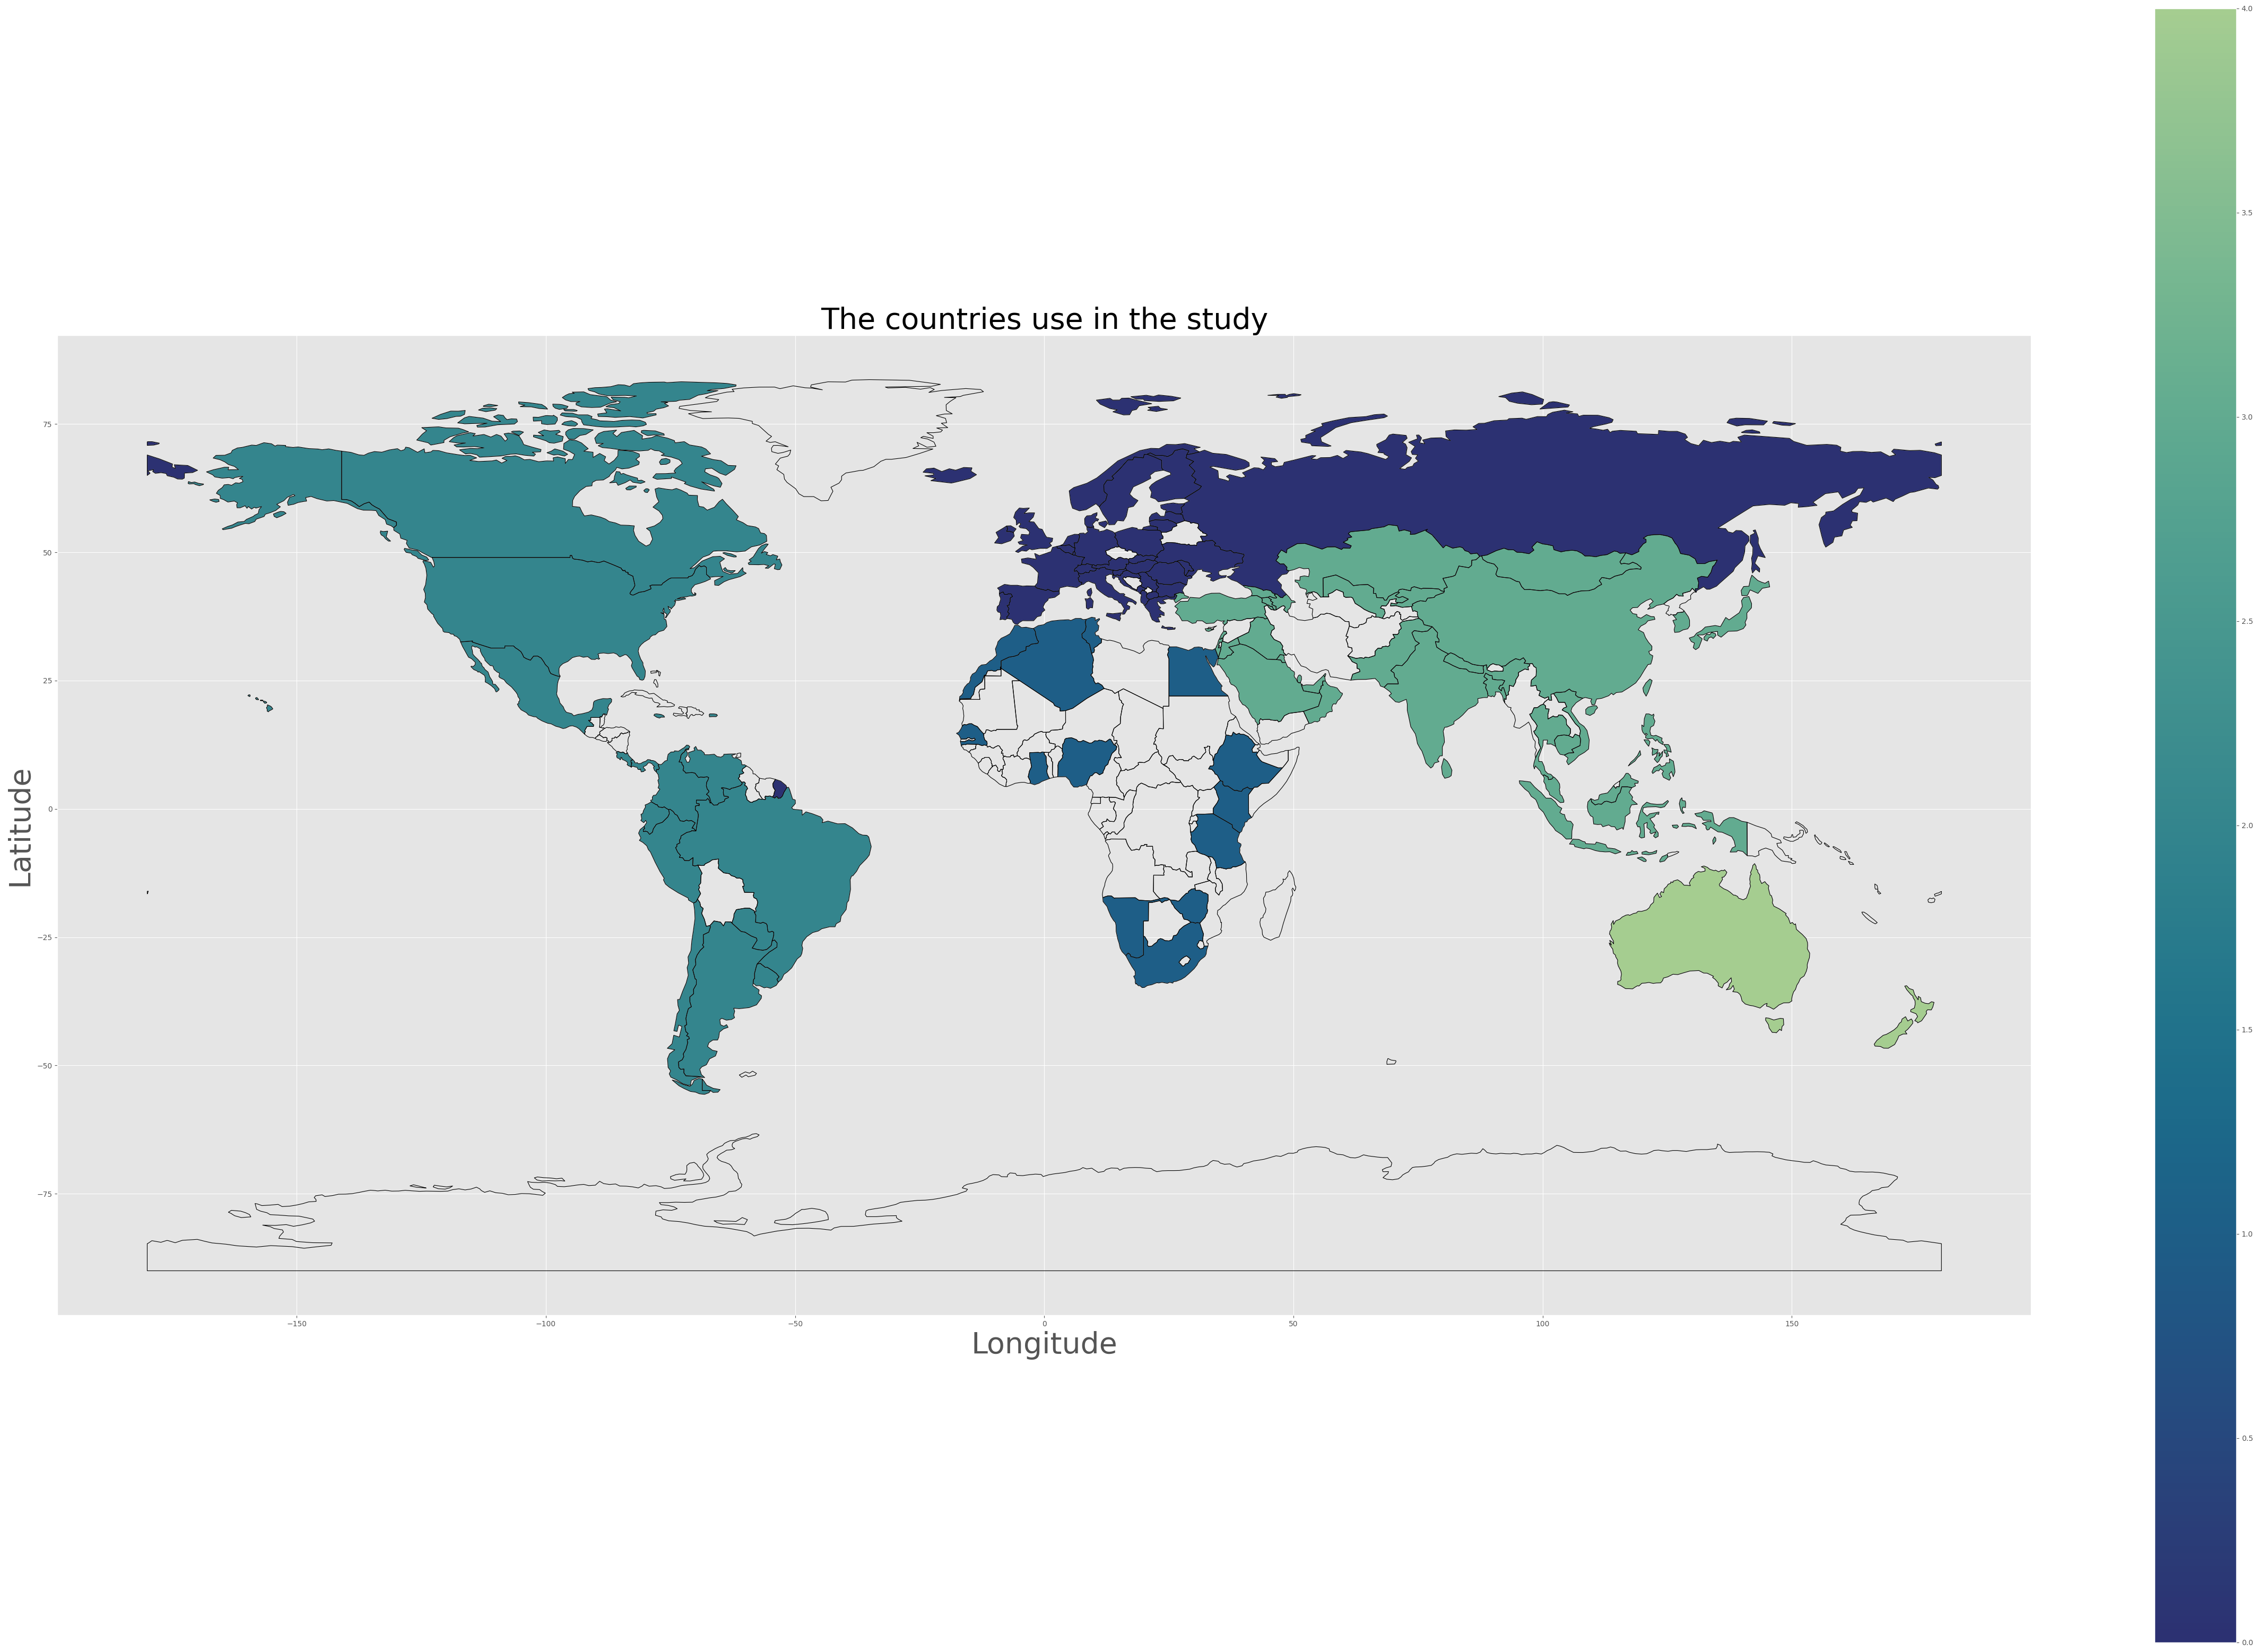

In [9]:
df_countries.insert(1, 'Population', df_countries.pop('Population'))
df_countries.insert(2, 'Yearly Change', df_countries.pop('Yearly Change'))
continents = df_countries['Continent'].unique()
df_countries['Continent_n'] = df_countries['Continent'].apply(lambda x: np.where(continents==x)[0][0])
plot_country_bubbles(df_countries, v_name_color='Continent_n', title='The countries use in the study', cmap_color='crest_r')
df_countries.drop(columns=['Continent_n'], inplace=True)

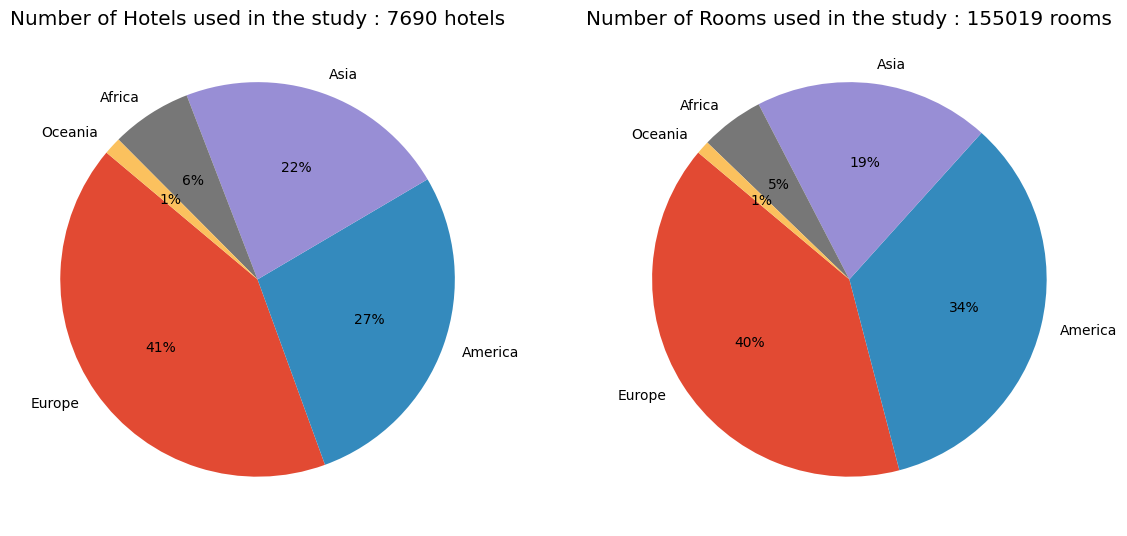

In [10]:
df = pd.merge(df_cities, df_countries, on='Country', how='inner')
df = pd.merge(df, df_hotels, on='City', how='inner')

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Hotel counts
hotel_counts = df['Continent'].value_counts()
total_hotels = hotel_counts.sum()
axs[0].pie(hotel_counts, labels=hotel_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[0].set_title(f'Number of Hotels used in the study : {total_hotels} hotels', color='black')

# Room counts
df = pd.merge(df, df_hotel_rooms, on='Url link', how='inner')
room_counts = df['Continent'].value_counts()
total_rooms = room_counts.sum()
axs[1].pie(room_counts, labels=room_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[1].set_title(f'Number of Rooms used in the study : {total_rooms} rooms', color='black')

plt.show()

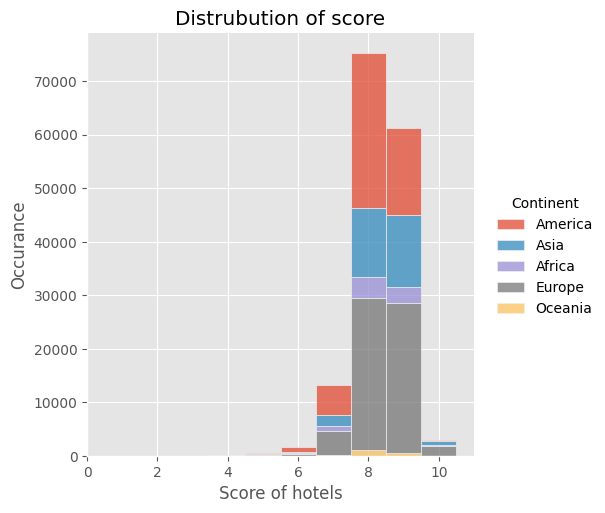

In [11]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Score", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of score")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

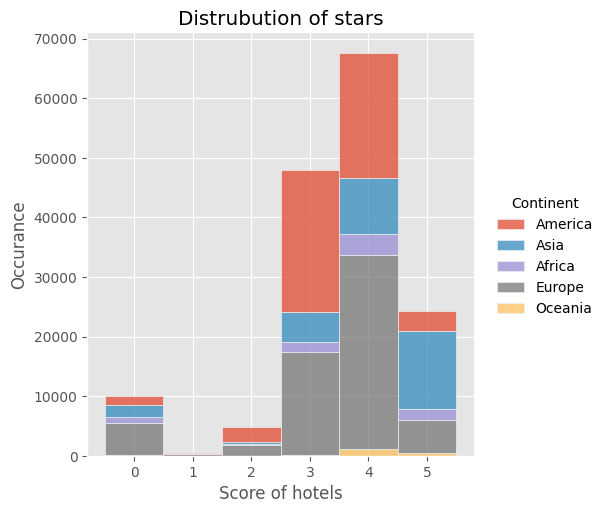

In [12]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Stars", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of stars")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

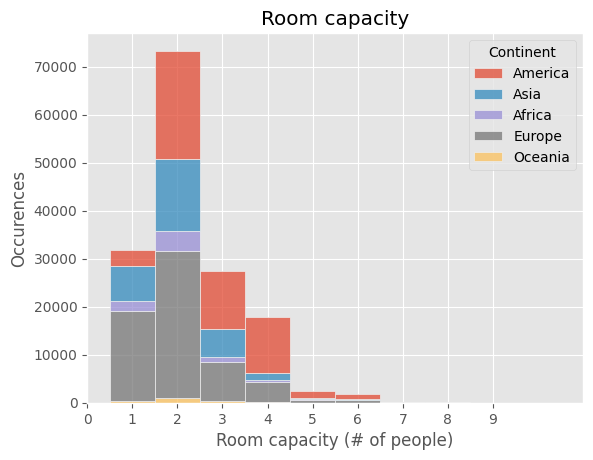

In [13]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.histplot(df_full, x="Guests nb",discrete=True, hue="Continent", multiple="stack")
	plt.title("Room capacity")
	plt.ylabel("Occurences")
	plt.xlabel("Room capacity (# of people)")
	plt.xticks(range(0,10))
	plt.xlim([0,11])
	plt.show()

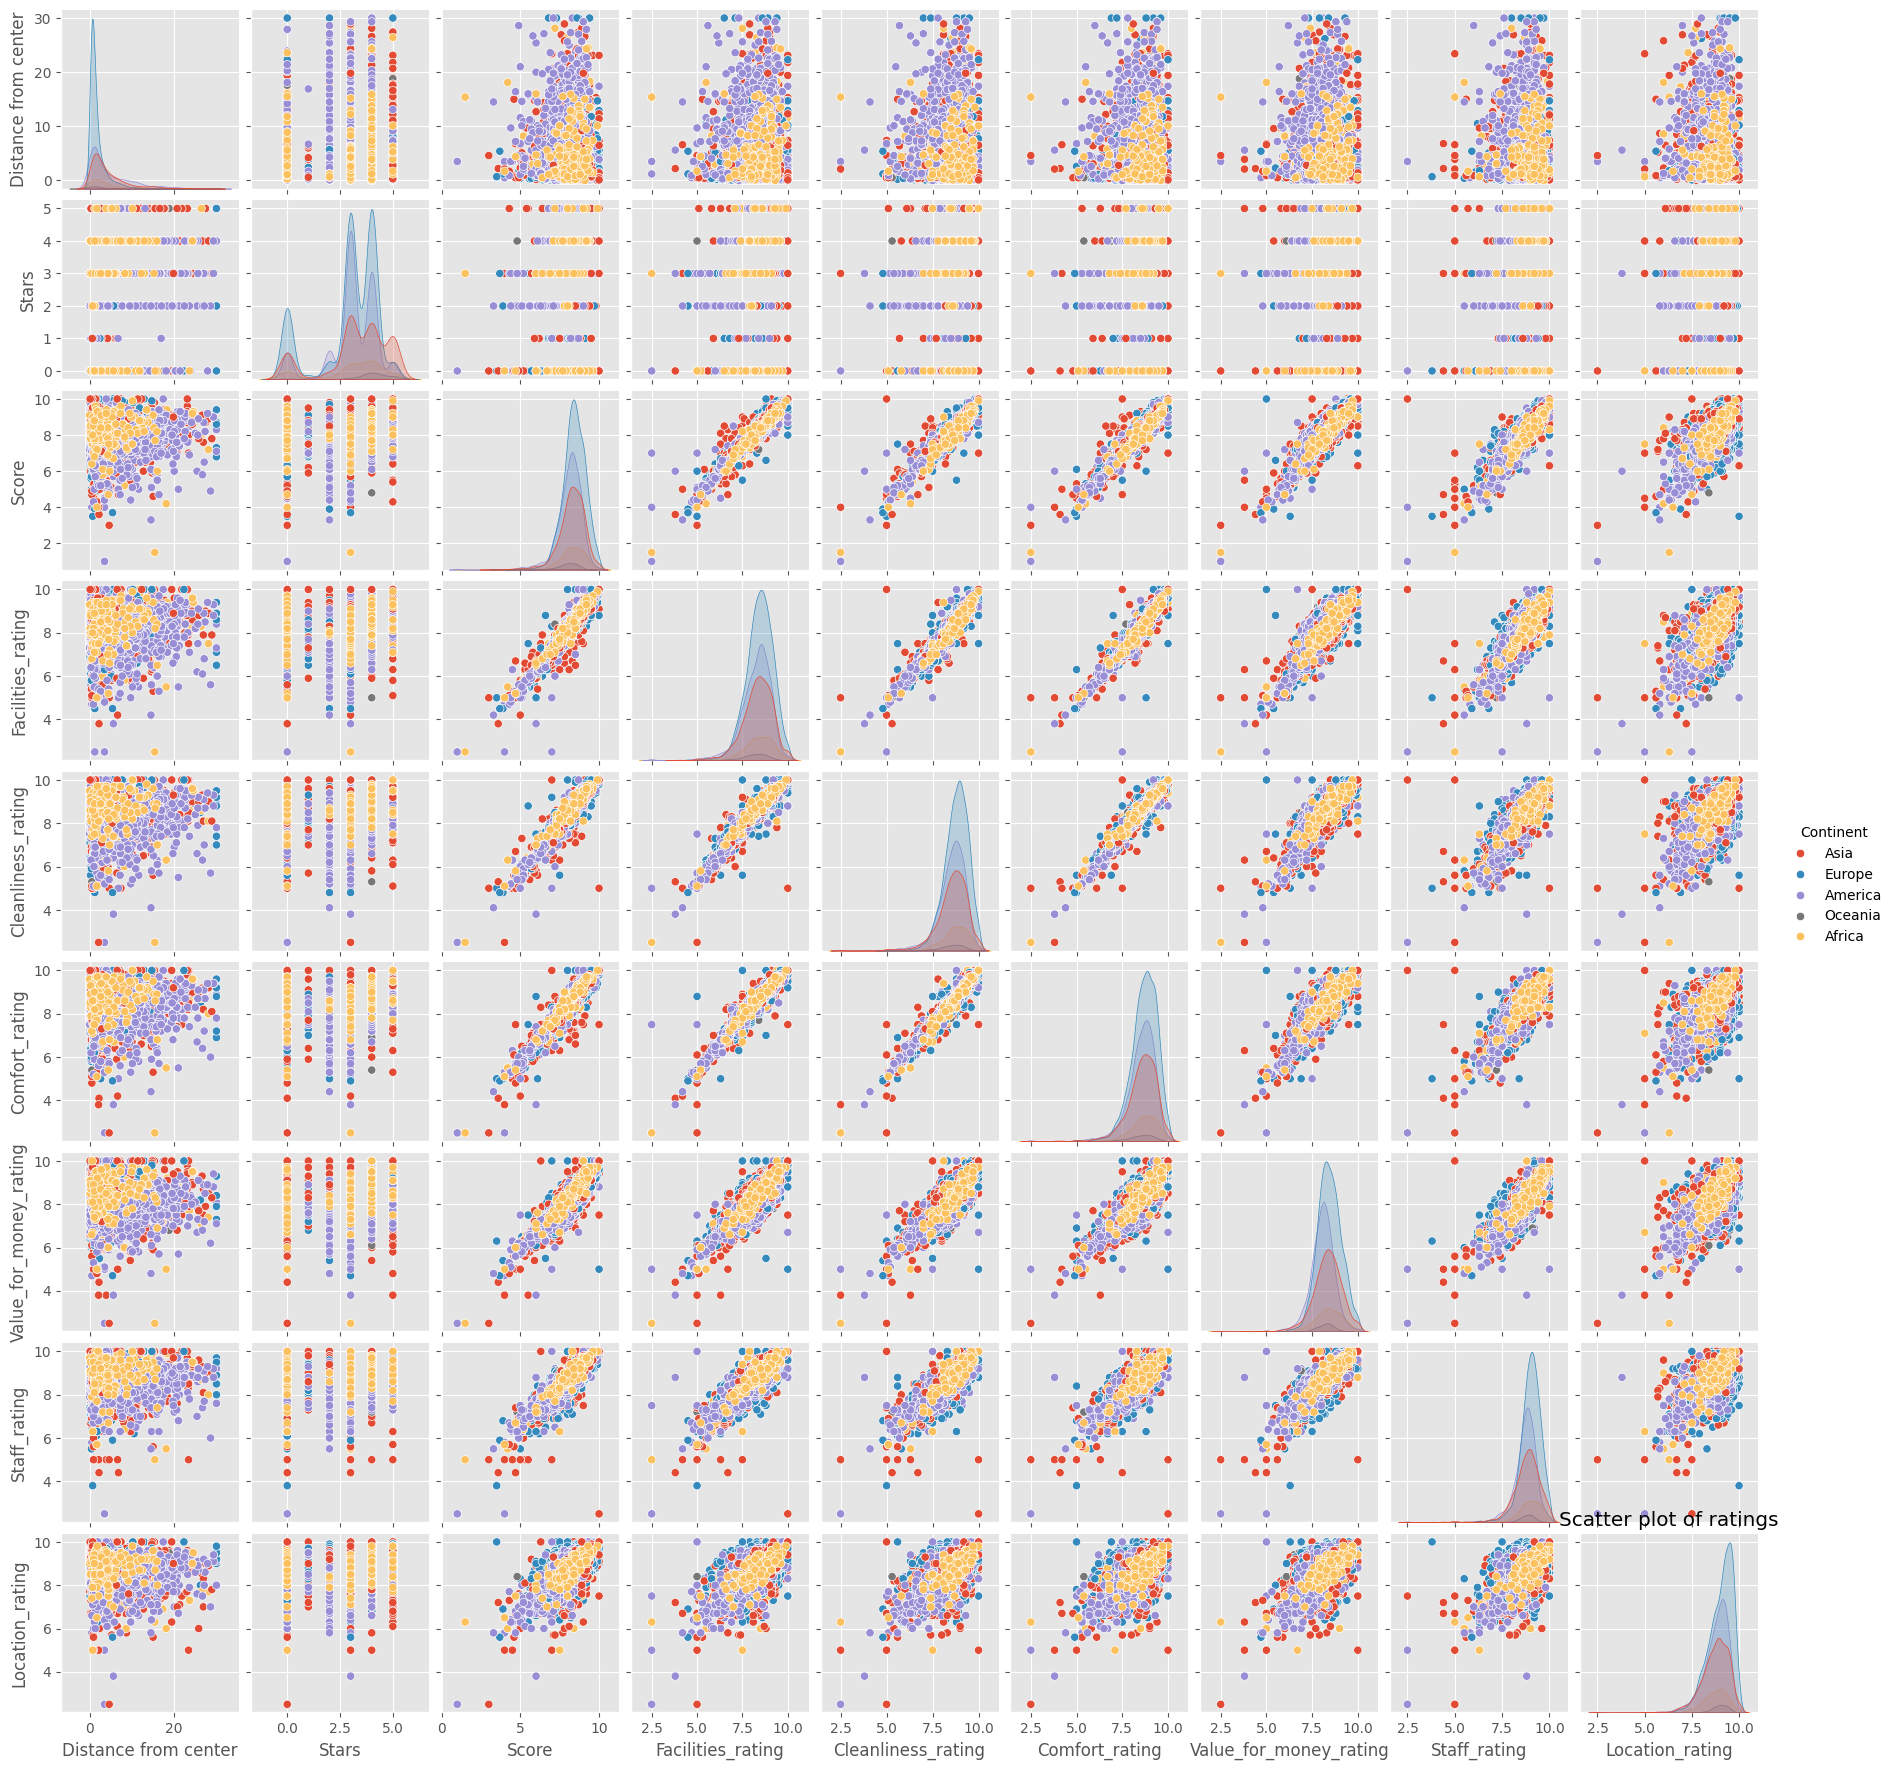

In [14]:
vars=["Distance from center", "Stars", "Score","Facilities_rating","Cleanliness_rating","Comfort_rating","Value_for_money_rating","Staff_rating","Location_rating"]
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.pairplot(df_full.groupby('Url link').first().reset_index(), vars=vars,
              height=2, hue="Continent")
	plt.title('Scatter plot of ratings')
	plt.show()

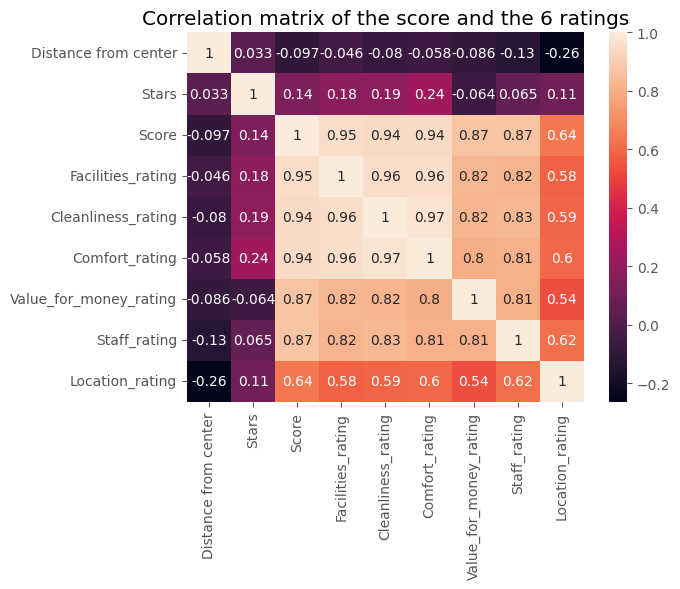

In [15]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.heatmap(df_hotels[vars].corr(), annot=True)
	plt.title("Correlation matrix of the score and the 6 ratings")
	plt.show()

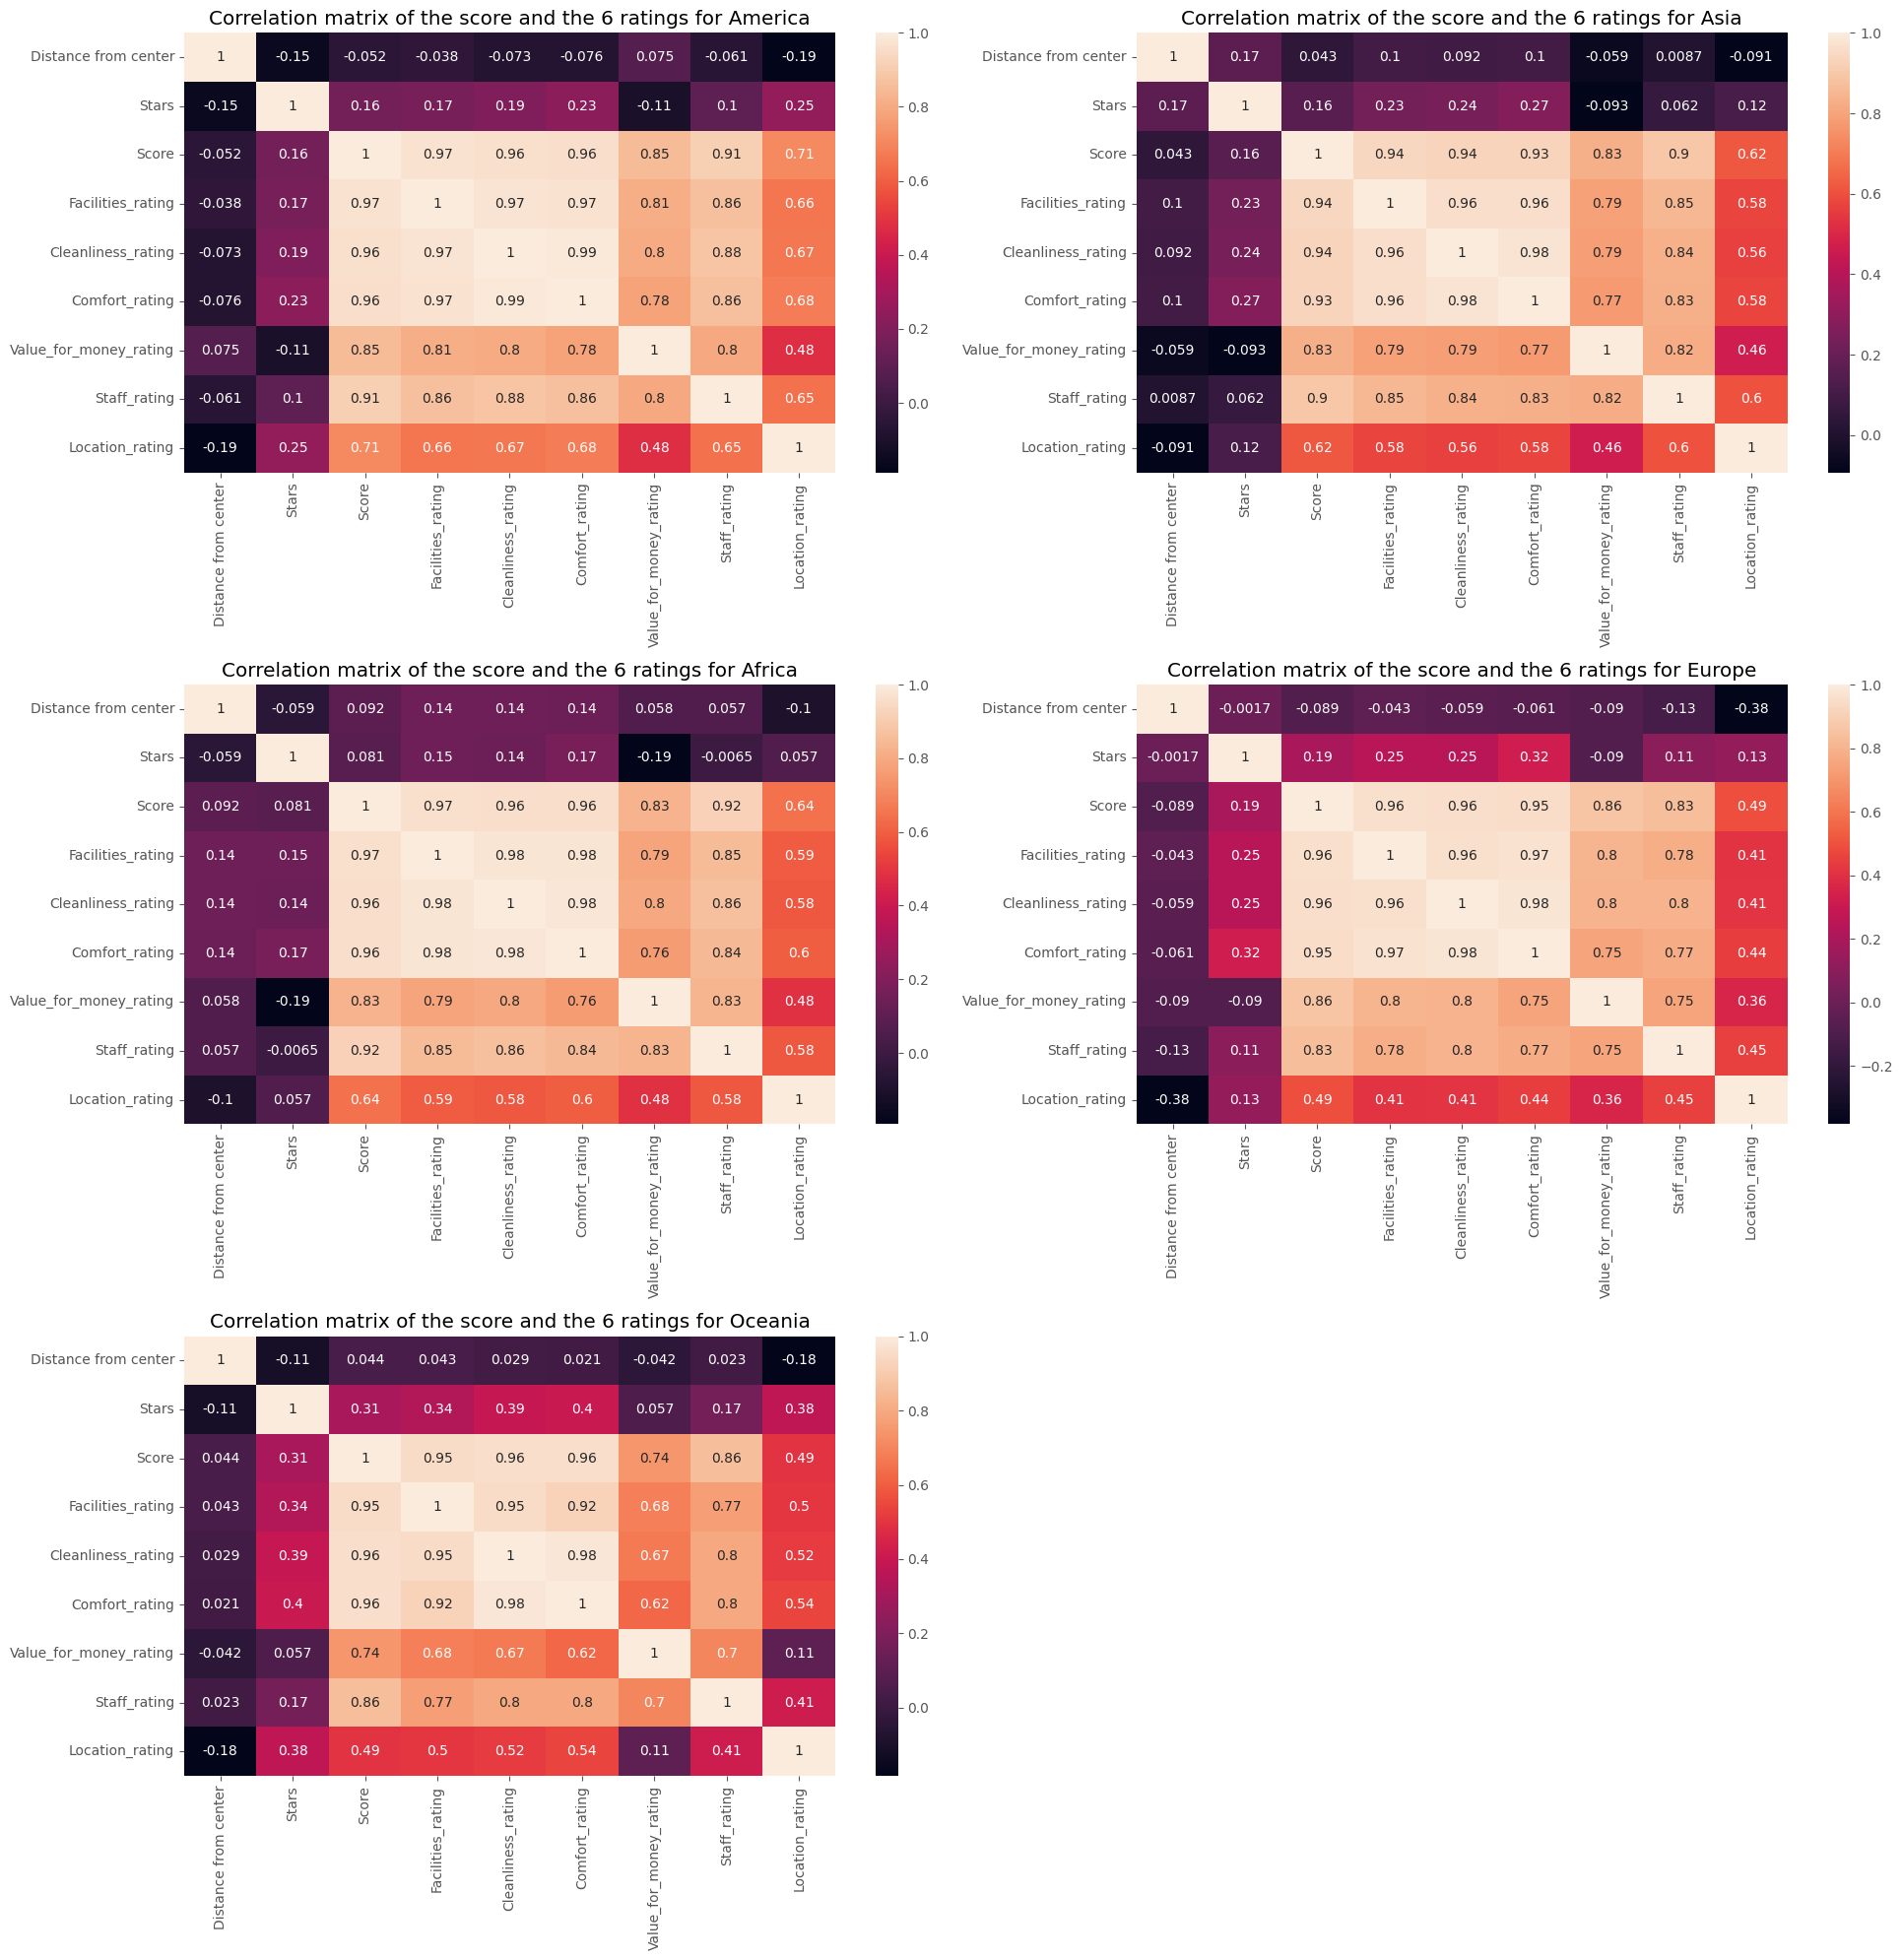

In [16]:
df = df_full.copy()
unique_hues = df['Continent'].unique()
n = len(unique_hues)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for ax, hue in zip(axs.flatten(), list(unique_hues) + [None]*(2*3 - n)):
    if hue is not None:
        subset = df[df['Continent'] == hue]
        correlation_matrix = subset[vars].corr()
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            sns.heatmap(correlation_matrix, annot=True, ax=ax)
            ax.set_title(f"Correlation matrix of the score and the 6 ratings for {hue}")
    else:
        fig.delaxes(ax)  # Remove empty subplots

plt.tight_layout()
plt.show()

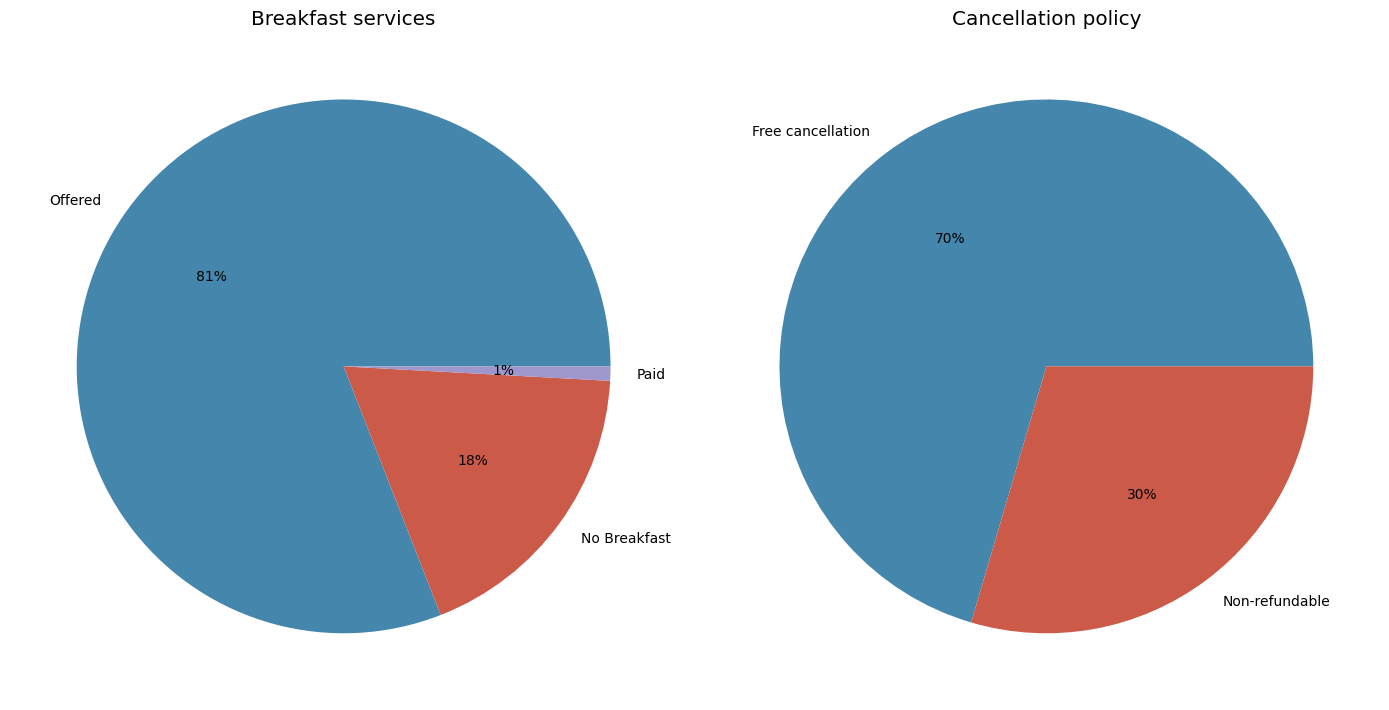

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Breakfast services pie chart
breakfast_counts = df_full['Breakfast'].value_counts()
breakfast_df = pd.DataFrame({
    'Type of Breakfast': ['Offered', 'No Breakfast', 'Paid'],
    'Percentage of Hotels (%)': breakfast_counts[[0, -1, 1]].values
})
axs[0].pie(breakfast_df['Percentage of Hotels (%)'], labels=breakfast_df['Type of Breakfast'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49','#9E97CC']) 
axs[0].set_title("Breakfast services")

# Cancellation policy pie chart
counts = df_full["Cancellation"].value_counts()
counts_df = pd.DataFrame({
    'Cancellation Policy': ['Free cancellation' if index == 1 else 'Non-refundable' for index in counts.index],
    'Count': counts.values
})
axs[1].pie(counts_df['Count'], labels=counts_df['Cancellation Policy'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49']) 
axs[1].set_title("Cancellation policy")

plt.tight_layout()
plt.show()

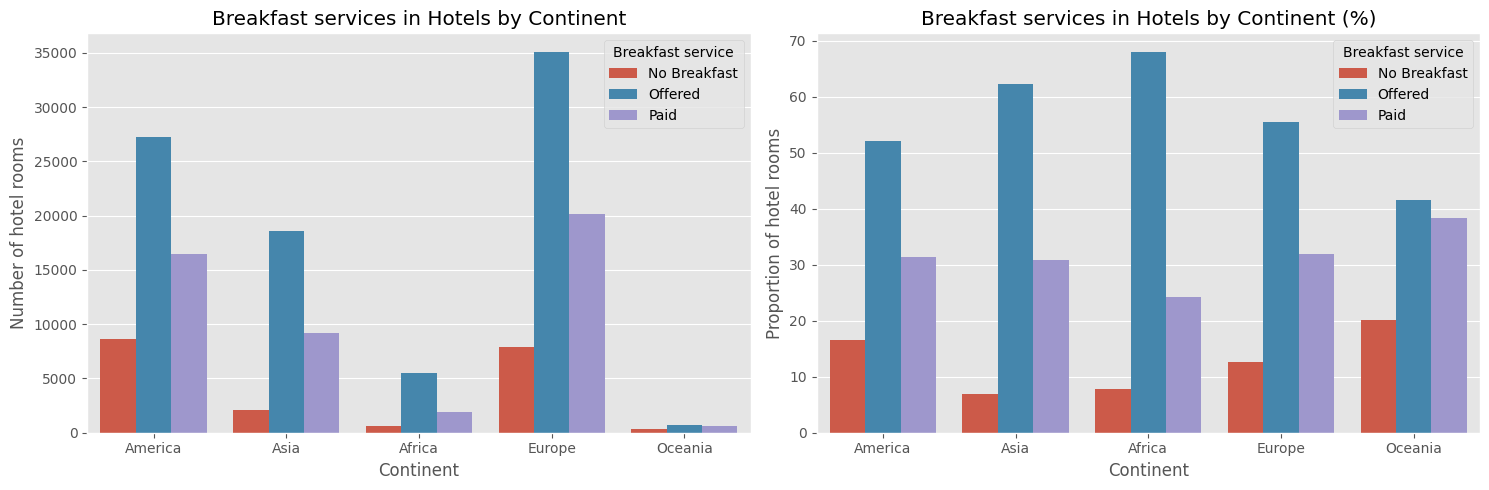

In [18]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == 0)]
    no_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == -1)]
    paid_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] > 0)]
    data.extend([(continent, 'No Breakfast') for _ in range(no_hotels.shape[0])])
    data.extend([(continent, 'Offered') for _ in range(free_hotels.shape[0])])
    data.extend([(continent, 'Paid') for _ in range(paid_hotels.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Breakfast'])
sns.countplot(x='Continent', hue='Breakfast', data=df)
plt.title('Breakfast services in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    no_breakfast_count = len(continent_data[continent_data['Breakfast'] == -1])
    offered_count = len(continent_data[continent_data['Breakfast'] == 0])
    paid_count = len(continent_data[continent_data['Breakfast'] > 0])
    if total_hotels > 0:
        no_breakfast_proportion = no_breakfast_count / total_hotels
        offered_proportion = offered_count / total_hotels
        paid_proportion = paid_count / total_hotels
        normalized_data.append((continent, 'No Breakfast', no_breakfast_proportion*100))
        normalized_data.append((continent, 'Offered', offered_proportion*100))
        normalized_data.append((continent, 'Paid', paid_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Breakfast', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Breakfast', data=df_normalized)
plt.title('Breakfast services in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

plt.tight_layout()
plt.show()


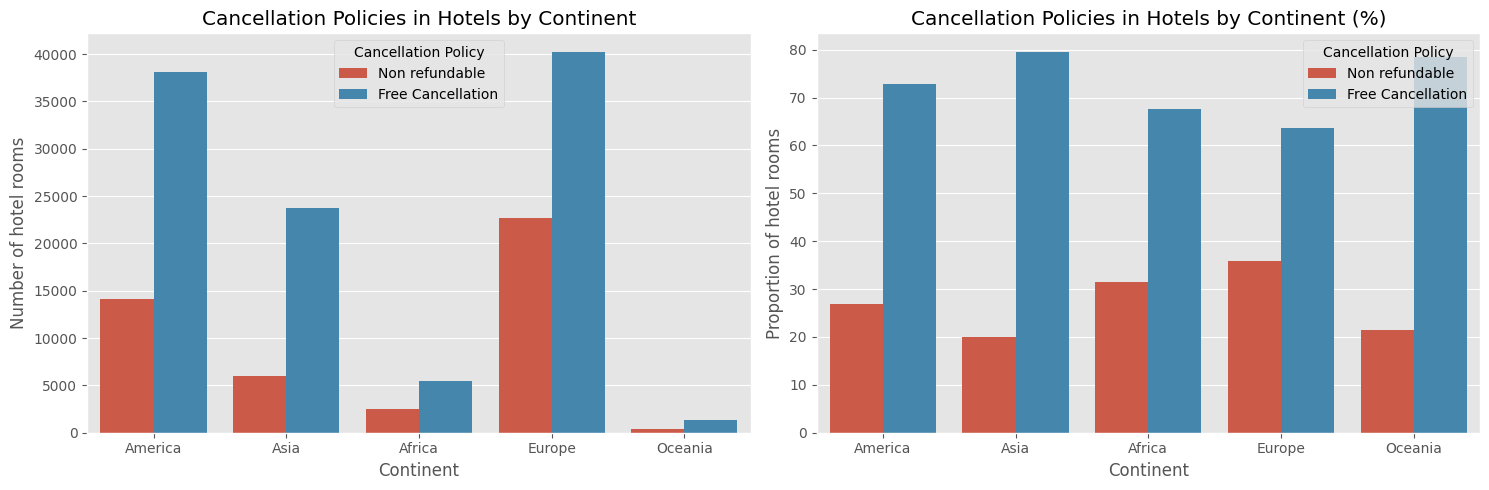

In [19]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 1)]
    no_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 0)]
    data.extend([(continent, 'Non refundable') for _ in range(no_cancellation.shape[0])])
    data.extend([(continent, 'Free Cancellation') for _ in range(free_cancellation.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Cancellation'])
sns.countplot(x='Continent', hue='Cancellation', data=df)
plt.title('Cancellation Policies in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    free_cancellation_count = len(continent_data[continent_data['Cancellation'] == 1])
    no_cancellation_count = len(continent_data[continent_data['Cancellation'] == 0])
    if total_hotels > 0:
        no_cancellation_proportion = no_cancellation_count / total_hotels
        free_cancellation_proportion = free_cancellation_count / total_hotels
        normalized_data.append((continent, 'Non refundable', no_cancellation_proportion*100))
        normalized_data.append((continent, 'Free Cancellation', free_cancellation_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Cancellation', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Cancellation', data=df_normalized)
plt.title('Cancellation Policies in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

plt.tight_layout()
plt.show()

In [20]:
numeric_cols = df_full.select_dtypes(include=[np.number]).columns.tolist()
# include also non numeric cols but encode them
non_numeric_cols = list(set(df_full.columns) - set(numeric_cols))
le = preprocessing.LabelEncoder()
df_full[non_numeric_cols] = df_full[non_numeric_cols].apply(lambda col: le.fit_transform(col))
all_cols = numeric_cols + non_numeric_cols
#remove Url link from all_cols
all_cols = [col for col in all_cols if col not in  ['Url link', 'Name', 'Location']]
# change only_hotel_var_list to include both numeric and non numeric vars
only_hotel_var_list = list(set(all_cols).intersection(set(columns_room)) - set(columns_city))
env_var_list =  list(set(all_cols).intersection(set(columns_city)))
display(only_hotel_var_list,env_var_list)

['Location_rating',
 'Stars',
 'Comfort_rating',
 'Guests nb',
 'Price',
 'Cancellation',
 'Cleanliness_rating',
 'Room Type',
 'Distance from center',
 'Score',
 'Facilities_rating',
 'Breakfast',
 'NbReviews',
 'Value_for_money_rating',
 'Staff_rating']

['Lettuce (1 head)',
 'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
 'Potato (1kg)',
 'Taxi Start (Normal Tariff)',
 'Cinema, International Release, 1 Seat',
 'Apartment (3 bedrooms) Outside of Centre',
 'Water (0.33 liter bottle)',
 'Domestic Beer (0.5 liter bottle)',
 'Price per Square Meter to Buy Apartment Outside of Centre',
 'land_area',
 '1 Pair of Nike Running Shoes (Mid-Range)',
 '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
 'Apples (1kg)',
 'Fitness Club, Monthly Fee for 1 Adult',
 'Banana (1kg)',
 'density',
 'Cappuccino (regular)',
 'Eggs (regular) (12)',
 'net_change',
 '1 Pair of Jeans (Levis 501 Or Similar)',
 'med_age',
 'fert_rate',
 'Onion (1kg)',
 'Continent',
 'Milk (regular), (1 liter)',
 'Apartment (3 bedrooms) in City Centre',
 'Local Cheese (1kg)',
 'Taxi 1hour Waiting (Normal Tariff)',
 'Domestic Beer (0.5 liter draught)',
 'Water (1.5 liter bottle)',
 'Tomato (1kg)',
 'Apartment (1 bedroom) in City Centre',
 'Oranges (1kg)',
 'M

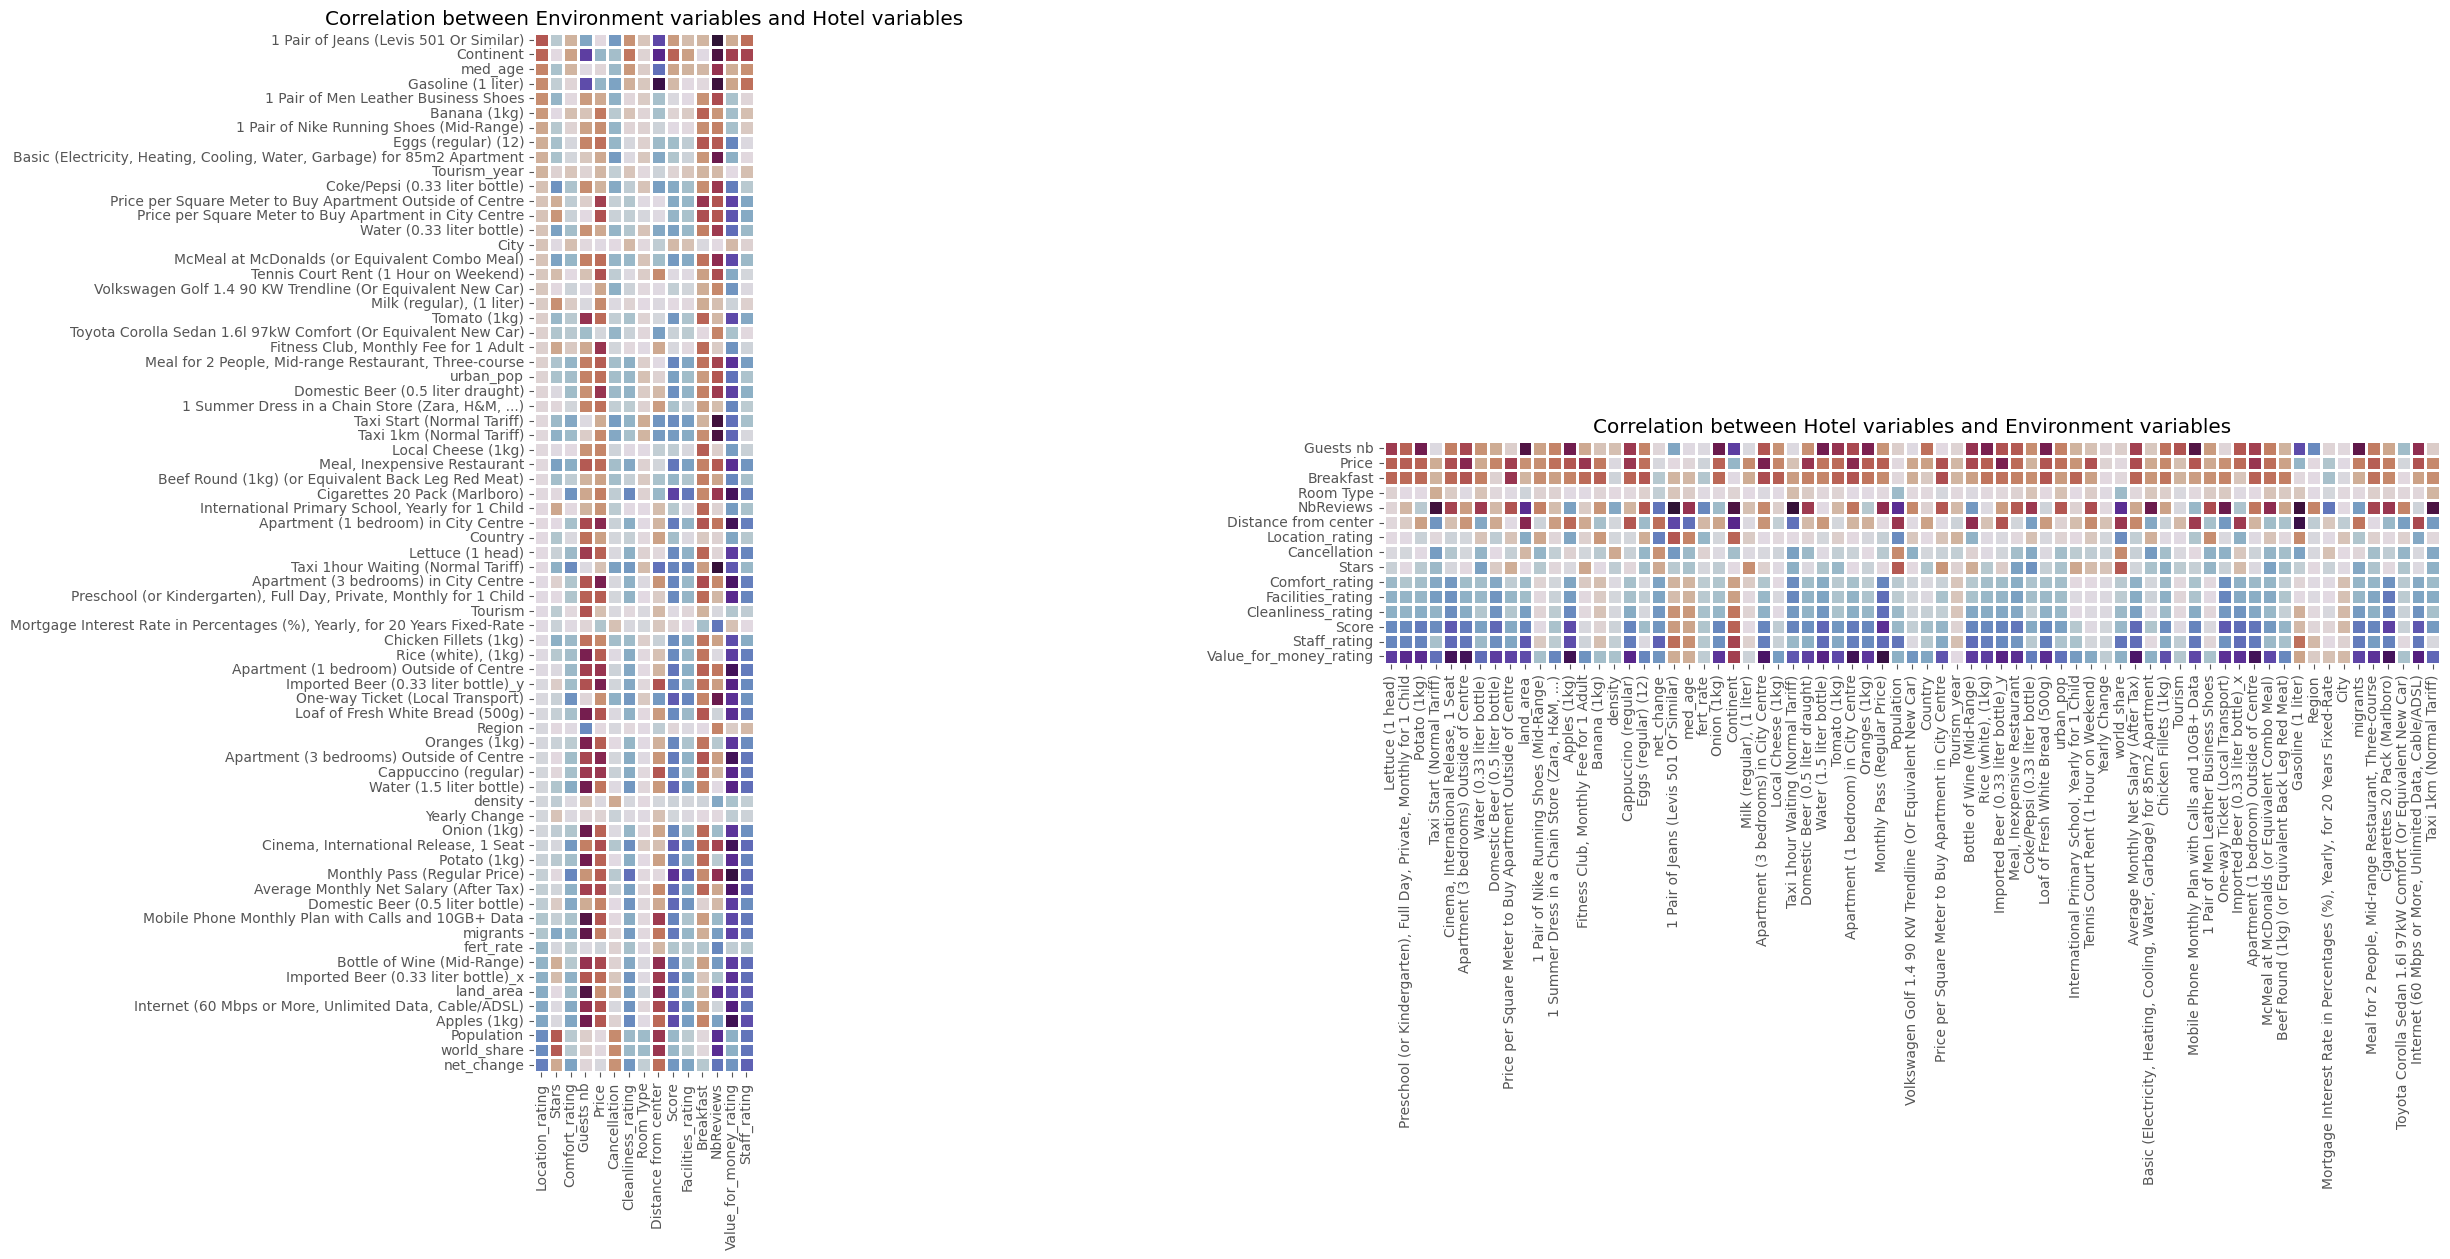

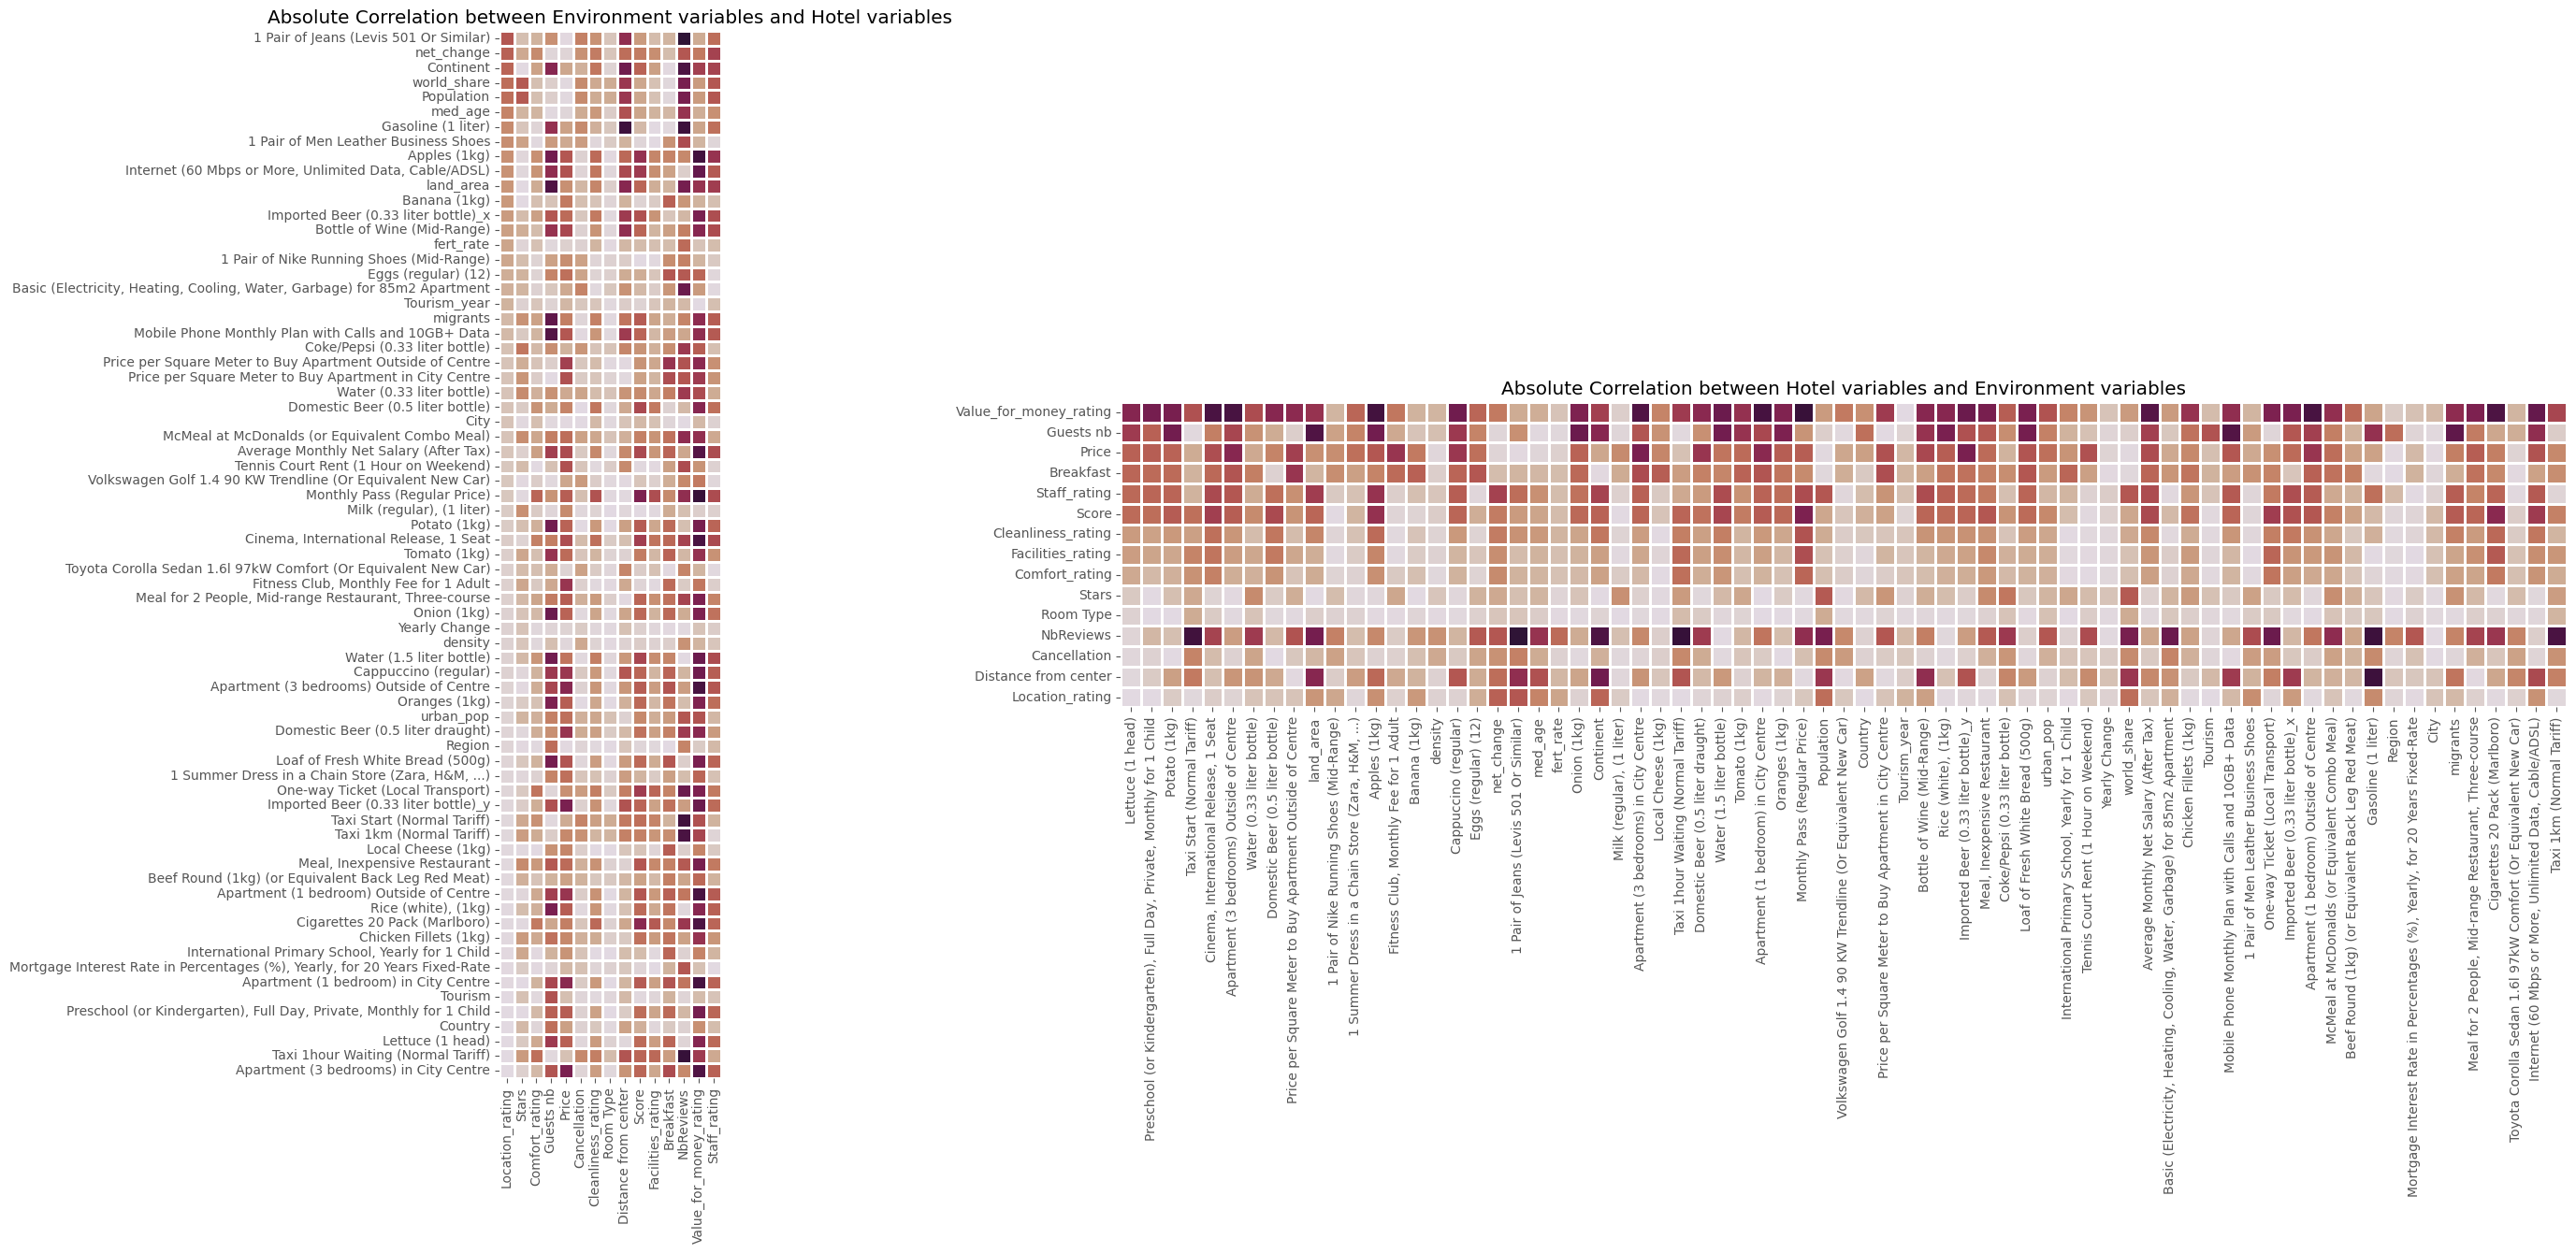

In [21]:
if os.path.exists('data/Hotel_and_Envirment_corr.csv'):
	Hotel_and_Envirment_corr = pd.read_csv('data/Hotel_and_Envirment_corr.csv')
	Hotel_and_Envirment_corr_abs = pd.read_csv('data/Hotel_and_Envirment_corr_abs.csv')
	plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
else:
	Hotel_and_Envirment_corr, Hotel_and_Envirment_corr_abs= plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
	Hotel_and_Envirment_corr.to_csv('data/Hotel_and_Envirment_corr.csv', index=False)
	Hotel_and_Envirment_corr_abs.to_csv('data/Hotel_and_Envirment_corr_abs.csv', index=False)

In [22]:
Hotel_and_Envirment_corr = Hotel_and_Envirment_corr.iloc[:, :-1]
corr_pairs = Hotel_and_Envirment_corr.unstack().sort_values(ascending=False).to_frame().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.iloc[::2]
corr_pairs = corr_pairs.sort_values(by='Abs Correlation', ascending=False)
print("The most correlated pairs of variables by abs value of the correlation:")
display(corr_pairs.groupby('Variable 1')['Abs Correlation'].sum().sort_values(ascending=False).reset_index())
display(corr_pairs.head(30).reset_index(drop=True))

The most correlated pairs of variables by abs value of the correlation:


Variable 1  Abs Correlation
0   Value_for_money_rating         5.704959
1                NbReviews         4.942469
2                    Price         4.583283
3                Guests nb         4.110288
4             Staff_rating         3.977005
5                    Score         3.405502
6                Breakfast         3.285402
7     Distance from center         3.011370
8           Comfort_rating         2.487837
9        Facilities_rating         2.359561
10      Cleanliness_rating         2.250519
11                   Stars         2.230213
12            Cancellation         2.106803
13         Location_rating         1.830133
14               Room Type         0.720152

Variable 1  Variable 2  Correlation  Abs Correlation
0                NbReviews           2     0.331068         0.331068
1   Value_for_money_rating          70    -0.312896         0.312896
2                NbReviews           1     0.303843         0.303843
3   Value_for_money_rating          69    -0.297342         0.297342
4   Value_for_money_rating          67    -0.292182         0.292182
5   Value_for_money_rating          65    -0.290347         0.290347
6                NbReviews          34     0.289978         0.289978
7                Guests nb          38     0.282094         0.282094
8   Value_for_money_rating          63    -0.281659         0.281659
9                Guests nb          42     0.266503         0.266503
10  Value_for_money_rating          61    -0.262261         0.262261
11               NbReviews          19     0.256678         0.256678
12  Value_for_money_rating          59    -0.255954         0.255954
13    Distance from center           0    -0.251331         0.251331
14               Guests nb          59     0.250069         0.250069
15               Guests nb          56     0.248685         0.248685
16               NbReviews          38    -0.245891         0.245891
17  Value_for_money_rating          55    -0.243898         0.243898
18               NbReviews          17    -0.243305         0.243305
19                   Price          60     0.242770         0.242770
20  Value_for_money_rating          53    -0.242130         0.242130
21                   Price          63     0.241049         0.241049
22  Value_for_money_rating          52    -0.240067         0.240067
23  Value_for_money_rating          50    -0.237430         0.237430
24  Value_for_money_rating          48    -0.229013         0.229013
25  Value_for_money_rating          46    -0.227557         0.227557
26                   Price          67     0.227542         0.227542
27  Value_for_money_rating          45    -0.226248         0.226248
28                   Price          68     0.224961         0.224961
29                   Score          64    -0.223645         0.223645

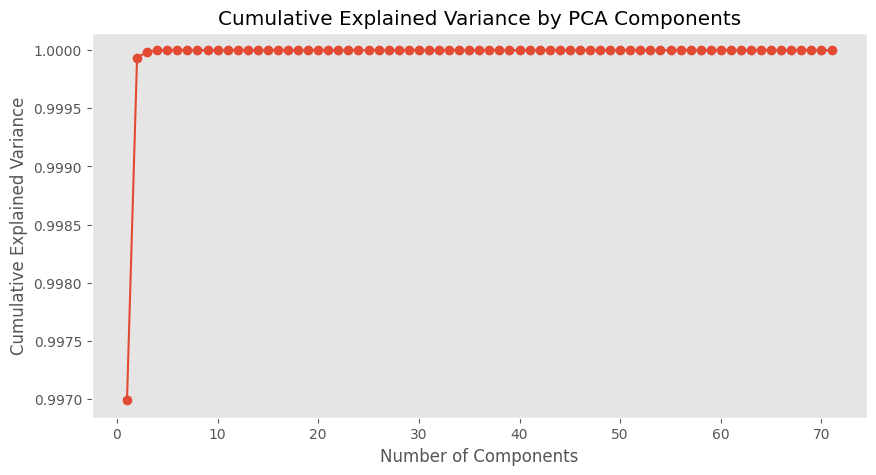

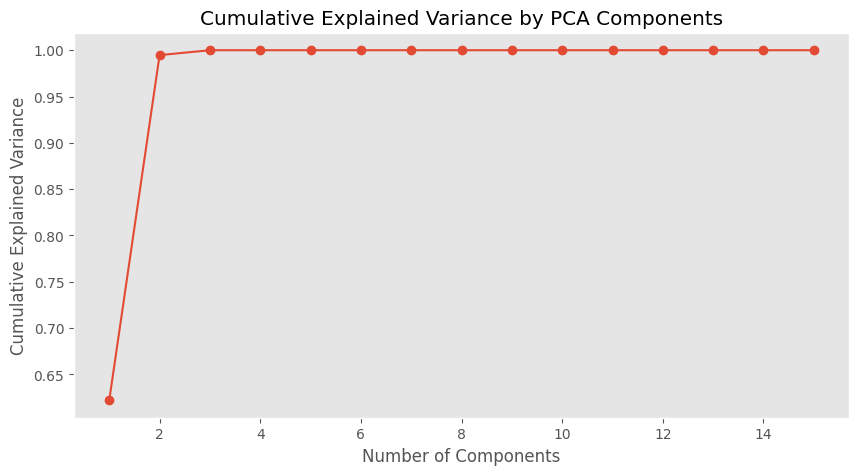

In [23]:
#do pca for the environment variables and show the variance explained by each component
pca = PCA()
pca.fit(df_full[env_var_list].dropna())
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()



pca_hotels = PCA()
pca_hotels.fit(df_full[only_hotel_var_list].dropna())
explained_variance = pca_hotels.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


In [24]:
num_pcs = 6
num_pcs_hotel = 3

pca_components_env = pca.fit_transform(df_full[env_var_list].dropna())
df_pca_env = pd.DataFrame(data = pca_components_env[:, :num_pcs], 
						  columns = [f'PC{i+1}_env' for i in range(num_pcs)])

pca_components_hotel = pca_hotels.fit_transform(df_full[only_hotel_var_list].dropna())
df_pca_hotel = pd.DataFrame(data = pca_components_hotel[:, :num_pcs_hotel], 
							columns = [f'PC{i+1}_hotel' for i in range(num_pcs_hotel)])
df_full_reset = df_full.reset_index(drop=True)
df_full_dropped = df_full_reset.drop(columns=env_var_list + only_hotel_var_list)

df_pca = pd.concat([df_full_dropped, df_pca_env, df_pca_hotel], axis=1)
df_pca = df_pca.drop(columns=['Name', 'Location', 'Url link'])
df_pca = df_pca.dropna()
display(df_pca.shape, df_pca.describe())

(36184, 11)

Region Number  Continent Number       PC1_env       PC2_env  \
count   36184.000000      36184.000000  3.618400e+04  3.618400e+04   
mean       72.538083         94.700337 -2.361519e-08 -1.001537e-09   
std        62.834859         65.887705  4.467956e+08  2.429488e+07   
min        13.000000          2.000000 -1.989640e+08 -1.872312e+07   
25%        21.000000         19.000000 -1.912886e+08 -1.557861e+07   
50%        30.000000        142.000000 -1.635518e+08 -7.933832e+06   
75%       151.000000        150.000000 -1.325222e+08  7.391847e+06   
max       151.000000        150.000000  1.228424e+09  9.808019e+07   

            PC3_env       PC4_env       PC5_env       PC6_env     PC1_hotel  \
count  3.618400e+04  3.618400e+04  3.618400e+04  3.618400e+04  36184.000000   
mean   1.844937e-10 -2.767406e-10 -6.094881e-11  4.221117e-12    -78.777022   
std    3.082484e+06  1.753680e+06  2.288054e+05  7.048667e+03   3770.167827   
min   -3.860419e+06 -4.318753e+06 -3.615763e+05 -1.650224e+04  -7037.229035   
25%   -1.024870e+06 -4.459689e+05 -8.342506e+04 -3.618310e+03  -3511.270953   
50%   -9.527581e+05  3.291117e+05 -2.728726e+04 -3.940227e+02     28.099303   
75%   -6.203788e+05  4.360532e+05  7.555840e+04  3.353528e+03   3448.424148   
max    1.421021e+07  5.592252e+06  1.611139e+06  1.970013e+04   7871.074707   

          PC2_hotel     PC3_hotel  
count  36184.000000  36184.000000  
mean    -455.064489    -41.540706  
std     2599.834420    296.581573  
min    -2791.655596   -264.996787  
25%    -1880.469514   -161.428364  
50%    -1204.130702   -103.516618  
75%       41.097787     -0.312933  
max    25725.868999  13384.910247

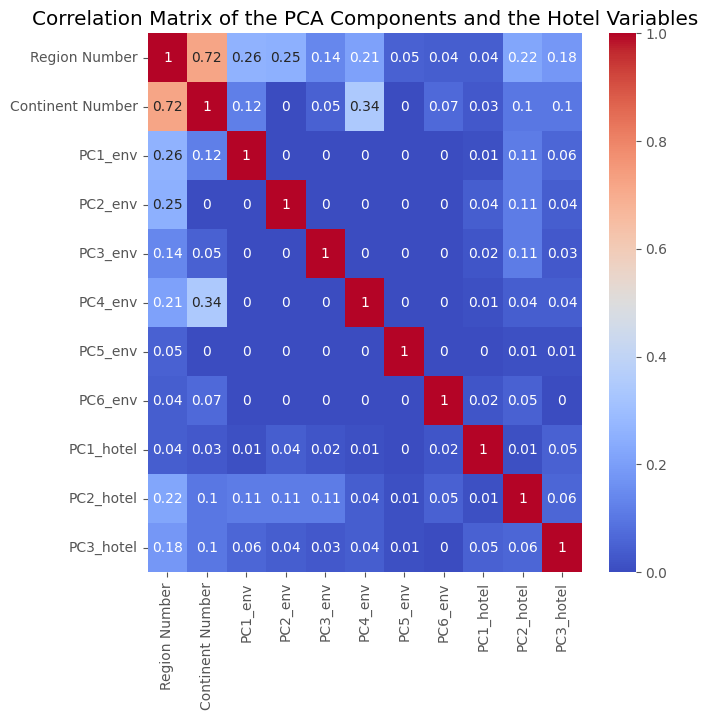

In [25]:
corr_matrix = df_pca.corr().abs().round(2)
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the PCA Components and the Hotel Variables')
plt.show()

### PCA 

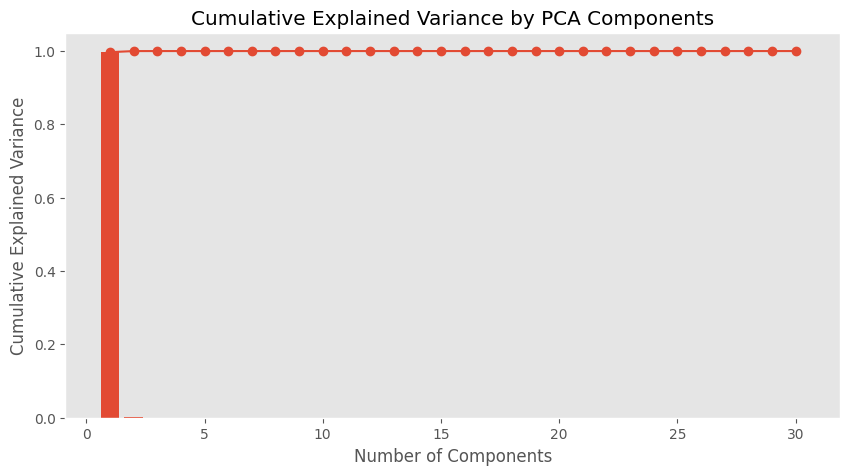

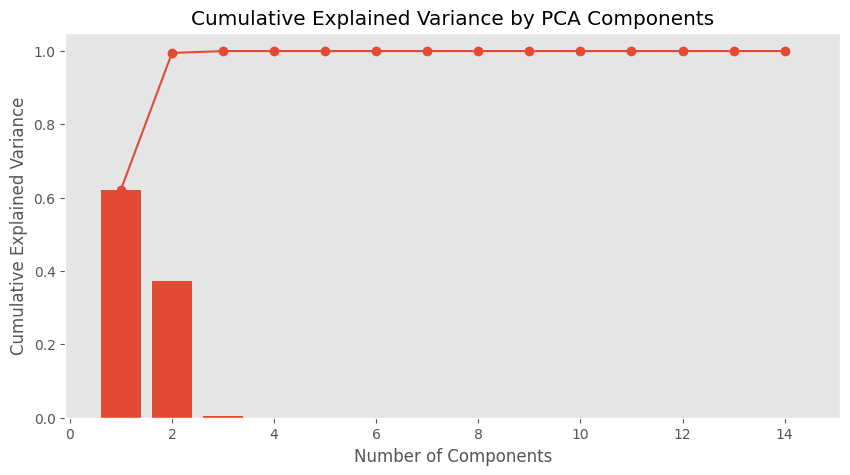

In [26]:
#do pca for the environment variables and show the variance explained by each component
pca = PCA(n_components=30)
pca.fit(df_full[env_var_list].dropna())
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()



pca_hotels = PCA()
only_hotel_var_list.remove('Score')
pca_hotels.fit(df_full[only_hotel_var_list].dropna())
only_hotel_var_list.append('Score')
explained_variance = pca_hotels.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


# only_hotel_var_list

# # Plot cumulative explained variance
# plt.figure(figsize=(10, 5))
# plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Individual Explained Variance')
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_cumulative, marker='o', label='Cumulative Explained Variance')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance by PCA Components')
# plt.legend()
# plt.grid()
# plt.show()  

In [27]:
num_pcs = 2
num_pcs_hotel = 2

pca_components_env = pca.fit_transform(df_full[env_var_list].dropna())
df_pca_env = pd.DataFrame(data = pca_components_env[:, :num_pcs], 
						  columns = [f'PC{i+1}_env' for i in range(num_pcs)])

pca_components_hotel = pca_hotels.fit_transform(df_full[only_hotel_var_list].dropna())
df_pca_hotel = pd.DataFrame(data = pca_components_hotel[:, :num_pcs_hotel], 
							columns = [f'PC{i+1}_hotel' for i in range(num_pcs_hotel)])
df_full_reset = df_full.reset_index(drop=True)
only_hotel_var_list.remove('Score')
df_full_dropped = df_full_reset.drop(columns=env_var_list + only_hotel_var_list)
only_hotel_var_list.append('Score')

df_pca = pd.concat([df_full_dropped, df_pca_env, df_pca_hotel], axis=1)
df_pca = df_pca.drop(columns=['Name', 'Location', 'Url link',"Region Number","Continent Number"])
df_pca = df_pca.dropna()
display(df_pca.shape, df_pca.describe())

(36184, 5)

Score       PC1_env       PC2_env     PC1_hotel     PC2_hotel
count  36184.000000  3.618400e+04  3.618400e+04  36184.000000  36184.000000
mean       8.416419 -3.710959e-08  3.162749e-10    -78.777022   -455.064489
std        0.672163  4.467956e+08  2.429488e+07   3770.167827   2599.834420
min        1.000000 -1.989640e+08 -1.872312e+07  -7037.229035  -2791.655596
25%        8.000000 -1.912886e+08 -1.557861e+07  -3511.270953  -1880.469514
50%        8.500000 -1.635518e+08 -7.933832e+06     28.099303  -1204.130702
75%        8.900000 -1.325222e+08  7.391847e+06   3448.424148     41.097787
max       10.000000  1.228424e+09  9.808019e+07   7871.074707  25725.868999

In [28]:
df_pca.head(2)

Score       PC1_env       PC2_env    PC1_hotel   PC2_hotel
0    8.2 -7.167888e+07  3.191793e+07 -1233.837404 -848.504995
1    8.2 -7.167888e+07  3.191793e+07 -1233.806019 -848.452207

## 3. MODELE

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(df_pca_train.drop("Score"), df_pca['Score'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_pca[["PC1_env","PC2_env","PC1_hotel","PC2_hotel"]],df_pca["Score"] , test_size=0.2, random_state=42)
# Step 5: Train your model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4370876142194691


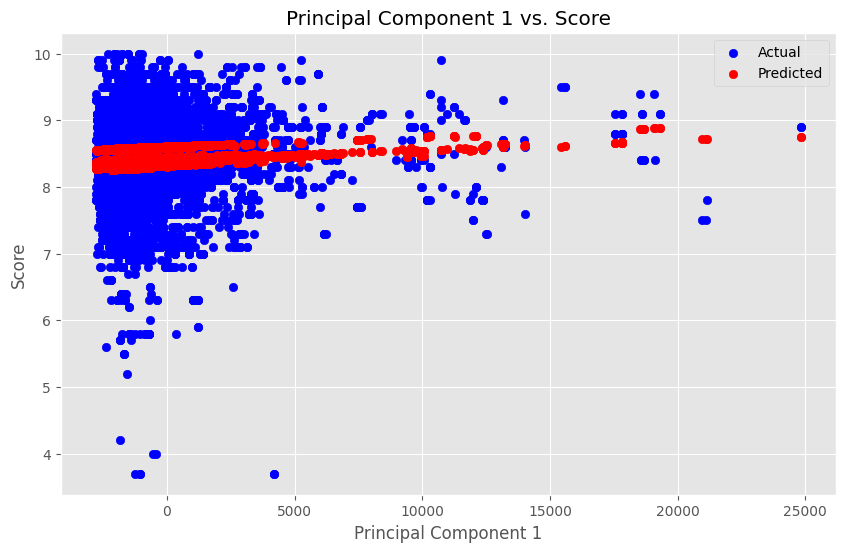

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test["PC2_hotel"], y_test, color='blue', label='Actual')
plt.scatter(X_test["PC2_hotel"], y_pred, color='red', label='Predicted')
plt.xlabel('Principal Component 1')
plt.ylabel('Score')
plt.title('Principal Component 1 vs. Score')
plt.legend()
plt.show()

PCA avec moins de colonne:


In [42]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]
df_hotel_rooms.head(2) 

Url link  Guests nb  Price  Cancellation  Room Type  Breakfast
0      5165        2.0  342.0           1.0       5760       23.0
1      5165        2.0  379.0           1.0       5760        0.0

In [43]:
df_hotels.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  Location_rating  \
0                   3.0    Ajman              8.9   
1                   0.1  Sharjah              9.0   

                                            Url link  Comfort_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...             9.1   
1  https://www.booking.com/hotel/ae/al-badayer-re...             9.4   

   Facilities_rating  Cleanliness_rating  NbReviews  Value_for_money_rating  \
0                8.9                 9.0     1441.0                     8.1   
1                9.1                 9.4     1606.0                     8.7   

   Staff_rating  
0           9.0  
1           9.7

In [44]:
df_cities.head(2)

City  Country  Lettuce (1 head)  Cinema, International Release, 1 Seat  \
0  Aachen  Germany              1.89                                  10.00   
1  Aarhus  Denmark              2.09                                  16.06   

   Potato (1kg)  Taxi Start (Normal Tariff)  \
0          1.41                         NaN   
1          1.83                        6.69   

   Apartment (3 bedrooms) Outside of Centre  Water (0.33 liter bottle)  \
0                                   1153.33                       2.26   
1                                   1520.92                       3.03   

   Apples (1kg)  Banana (1kg)  Fitness Club, Monthly Fee for 1 Adult  \
0          2.62          1.31                                  28.00   
1          2.56          2.88                                  36.48   

   Milk (regular), (1 liter)  Apartment (3 bedrooms) in City Centre  \
0                       1.04                                1400.00   
1                       1.72                                2074.53   

   Local Cheese (1kg)  Taxi 1hour Waiting (Normal Tariff)  \
0               12.27                                 NaN   
1               11.06                                 NaN   

   Water (1.5 liter bottle)  Tomato (1kg)  \
0                      0.77           3.0   
1                      0.84           5.0   

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                                NaN             

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            6490.00        
1                                            6265.42        

   Bottle of Wine (Mid-Range)  Rice (white), (1kg)  \
0                        5.99                 2.79   
1                        8.70                 2.20   

   Imported Beer (0.33 liter bottle)_y  Meal, Inexpensive Restaurant  \
0                                 4.00                         11.85   
1                                 5.35                         20.08   

   Coke/Pepsi (0.33 liter bottle)  Tennis Court Rent (1 Hour on Weekend)  \
0                            2.38                                   14.5   
1                            4.17                                    NaN   

   Average Monthly Net Salary (After Tax)  \
0                                 2740.90   
1                                 3392.21   

   Mobile Phone Monthly Plan with Calls and 10GB+ Data  Chicken Fillets (1kg)  \
0                                              12.40                    14.96   
1                                              17.18                    10.32   

   Imported Beer (0.33 liter bottle)_x  \
0                                 1.39   
1                                 1.77   

   Apartment (1 bedroom) Outside of Centre  \
0                                   508.75   
1                                   790.78   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              65.00       
1                                             102.39       

   Cigarettes 20 Pack (Marlboro)  \
0                            8.2   
1                            8.7   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                                NaN                
1                                           42605.95                

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                                NaN                     
1                                                NaN                     

   Domestic Beer (0.5 liter bottle)  \
0                              0.84   
1                              1.56   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                            3

In [47]:
df_hotels_cities = pd.merge(df_hotels,df_cities, on='City', how='inner')
# df_hotels_cities.head(2)

In [78]:
cols_to_use =['International Primary School, Yearly for 1 Child',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Cinema, International Release, 1 Seat', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'Cappuccino (regular)', 'Domestic Beer (0.5 liter draught)',
       'Average Monthly Net Salary (After Tax)',
       'Monthly Pass (Regular Price)', 
       'Loaf of Fresh White Bread (500g)', 
       'Imported Beer (0.33 liter bottle)_y'
       ]

Non numeric columns:  ['City']
columns: 22


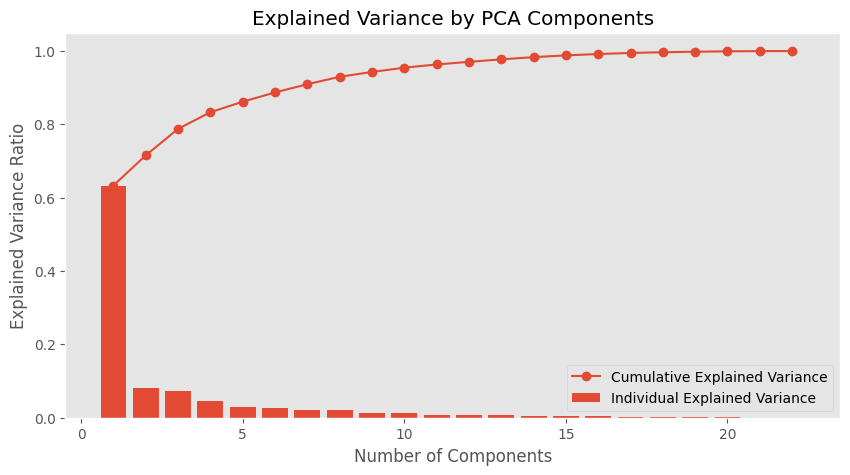

In [79]:
non_numeric_cols = df.drop(['Score'],axis=1,inplace=False).select_dtypes(include='object').columns.tolist()
print("Non numeric columns: ",non_numeric_cols)

# Remove non-numeric columns
numeric_cols = df.drop('Score',axis=1,inplace=False).drop(non_numeric_cols, axis=1)
print('columns:',len(numeric_cols.columns))

# Handle missing values
numeric_cols.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
numeric_cols_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA()
pca.fit(numeric_cols_scaled)

# Determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_cumulative, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid()
plt.show()

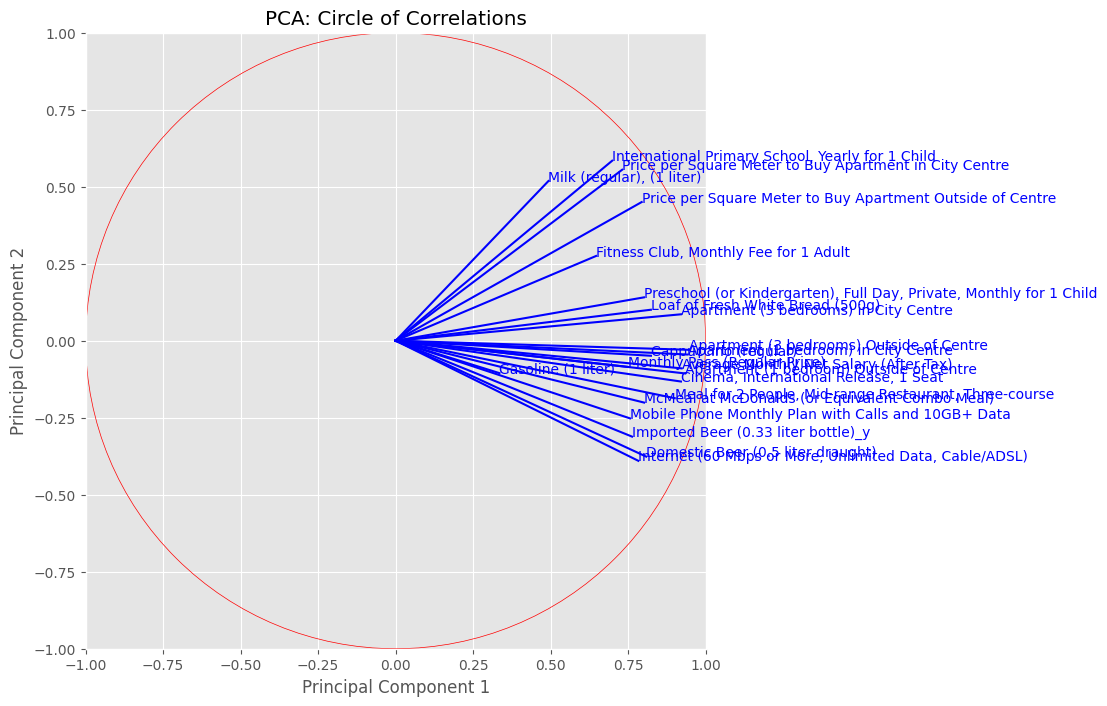

In [80]:
# Calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a new figure
plt.figure(figsize=(8, 8))

# Plot each loading
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.plot([0, x], [0, y], color='b')
    plt.text(x, y, numeric_cols.columns[i], color='b')

# Plot a circle
circle = plt.Circle((0, 0), 1, color='r', fill=False)
plt.gca().add_artist(circle)

# Set limits, labels and title
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Circle of Correlations')
plt.grid(True)
plt.show()

In [82]:
pca = PCA(n_components=8) 
pca.fit(numeric_cols_scaled)
numeric_features_pca = pca.transform(numeric_cols_scaled)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numeric_features_pca, df['Score'], test_size=0.2, random_state=42)


# Step 5: Train your model (e.g., Linear Regression)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08422740051381604


In [83]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06789916384690114


## Classification